<a href="https://colab.research.google.com/github/CodeCraftsman74/Glass-classification/blob/main/SVM%2C_NAVIE%2CDECISION_TREE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Load the dataset
data_file_path = '/content/glass.data'
names_file_path = '/content/glass.names'

column_names = ["RI", "Na", "Mg", "Al", "Si", "K", "Ca", "Ba", "Fe", "Type"]




glass_df = pd.read_csv(data_file_path, names=column_names)

glass_df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
glass_df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [ ]:
data = glass_df
print('The number of missing value for this dataframe is:')
print(data.isna().sum())

The number of missing value for this dataframe is:
RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64


In [ ]:
print('The number of duplicated row for this dataframe is: ', data.duplicated().sum(), '\n')

The number of duplicated row for this dataframe is:  1 



In [ ]:
data = data.drop_duplicates()
print('The number of duplicated row for this dataframe is: ', data.duplicated().sum(), '\n')

The number of duplicated row for this dataframe is:  0 



In [ ]:
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Assuming 'data' is your DataFrame
X = data.drop(columns=['Type'])
y = data['Type']

# Standardize the data
sc = StandardScaler()
X = sc.fit_transform(X)

# Initialize the model
model = LogisticRegression()

# K-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(model, X, y, cv=kf, scoring='accuracy')

print(f'Cross-Validation Accuracy Scores: {cv_scores}')
print(f'Mean Cross-Validation Accuracy: {cv_scores.mean()}')


Cross-Validation Accuracy Scores: [0.74418605 0.60465116 0.55813953 0.66666667 0.66666667]
Mean Cross-Validation Accuracy: 0.6480620155038759


# Naive bayes

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

# Splitting into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Applying Naive Bayes classification
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Predicting the test set
y_pred = gnb.predict(X_test)

# Getting the accuracy score and classification report
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)


classification_report(y_test, y_pred)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)
accuracy

              precision    recall  f1-score   support

           1       0.39      0.90      0.55        10
           2       0.67      0.13      0.22        15
           3       0.00      0.00      0.00         3
           5       0.33      0.33      0.33         3
           6       1.00      1.00      1.00         3
           7       0.80      0.89      0.84         9

    accuracy                           0.53        43
   macro avg       0.53      0.54      0.49        43
weighted avg       0.58      0.53      0.47        43



0.5348837209302325

In [ ]:
classification_report(y_test, y_pred)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)


              precision    recall  f1-score   support

           1       0.39      0.90      0.55        10
           2       0.67      0.13      0.22        15
           3       0.00      0.00      0.00         3
           5       0.33      0.33      0.33         3
           6       1.00      1.00      1.00         3
           7       0.80      0.89      0.84         9

    accuracy                           0.53        43
   macro avg       0.53      0.54      0.49        43
weighted avg       0.58      0.53      0.47        43



array([[ 9,  1,  0,  0,  0,  0],
       [11,  2,  1,  1,  0,  0],
       [ 3,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  1,  0,  2],
       [ 0,  0,  0,  0,  3,  0],
       [ 0,  0,  0,  1,  0,  8]])

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred_nb = gnb.predict(X_test)
print("Gaussian Navie")
print(classification_report(y_test, y_pred_nb))
print(confusion_matrix(y_test, y_pred_nb))
print(accuracy_score(y_test, y_pred_nb))


Gaussian Navie
              precision    recall  f1-score   support

           1       0.39      0.90      0.55        10
           2       0.67      0.13      0.22        15
           3       0.00      0.00      0.00         3
           5       0.33      0.33      0.33         3
           6       1.00      1.00      1.00         3
           7       0.80      0.89      0.84         9

    accuracy                           0.53        43
   macro avg       0.53      0.54      0.49        43
weighted avg       0.58      0.53      0.47        43

[[ 9  1  0  0  0  0]
 [11  2  1  1  0  0]
 [ 3  0  0  0  0  0]
 [ 0  0  0  1  0  2]
 [ 0  0  0  0  3  0]
 [ 0  0  0  1  0  8]]
0.5348837209302325


# SVM


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)


In [ ]:
from sklearn.svm import SVC
svm_linear = SVC(kernel='linear', C=1.0)
svm_linear.fit(X_train, y_train)
y_pred = svm_linear.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.734375
[[15  2  1  0  0  0]
 [ 6 17  0  1  0  0]
 [ 1  3  0  0  0  0]
 [ 0  0  0  4  0  0]
 [ 0  1  0  0  2  0]
 [ 1  1  0  0  0  9]]
              precision    recall  f1-score   support

           1       0.65      0.83      0.73        18
           2       0.71      0.71      0.71        24
           3       0.00      0.00      0.00         4
           5       0.80      1.00      0.89         4
           6       1.00      0.67      0.80         3
           7       1.00      0.82      0.90        11

    accuracy                           0.73        64
   macro avg       0.69      0.67      0.67        64
weighted avg       0.72      0.73      0.72        64



In [ ]:

from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1, 1, 10], 'gamma': ['scale', 'auto']}
grid = GridSearchCV(SVC(kernel='rbf'), param_grid, refit=True, verbose=2)
grid.fit(X_train, y_train)


Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] END .................................C=0.1, gamma=scale; total time=   0.0s
[CV] END .................................C=0.1, gamma=scale; total time=   0.0s
[CV] END .................................C=0.1, gamma=scale; total time=   0.0s
[CV] END .................................C=0.1, gamma=scale; total time=   0.0s
[CV] END .................................C=0.1, gamma=scale; total time=   0.0s
[CV] END ..................................C=0.1, gamma=auto; total time=   0.0s
[CV] END ..................................C=0.1, gamma=auto; total time=   0.0s
[CV] END ..................................C=0.1, gamma=auto; total time=   0.0s
[CV] END ..................................C=0.1, gamma=auto; total time=   0.0s
[CV] END ..................................C=0.1, gamma=auto; total time=   0.0s
[CV] END ...................................C=1, gamma=scale; total time=   0.0s
[CV] END ...................................C=1, 

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'gamma': ['scale', 'auto']},
             verbose=2)

In [ ]:
from sklearn.svm import SVC
svm_rbf = SVC(kernel='rbf', C=1.0, gamma='auto')  # You can tune 'C' and 'gamma'
svm_rbf.fit(X_train, y_train)
y_pred = svm_rbf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("SVM RBF")
print(f"Accuracy: {accuracy}")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


SVM RBF
Accuracy: 0.703125
[[15  3  0  0  0  0]
 [ 6 18  0  0  0  0]
 [ 1  3  0  0  0  0]
 [ 0  2  0  2  0  0]
 [ 0  1  0  0  2  0]
 [ 0  3  0  0  0  8]]
              precision    recall  f1-score   support

           1       0.68      0.83      0.75        18
           2       0.60      0.75      0.67        24
           3       0.00      0.00      0.00         4
           5       1.00      0.50      0.67         4
           6       1.00      0.67      0.80         3
           7       1.00      0.73      0.84        11

    accuracy                           0.70        64
   macro avg       0.71      0.58      0.62        64
weighted avg       0.70      0.70      0.68        64



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:


# SVM with Polynomial Kernel
svm_poly = SVC(kernel='poly', degree=1, C=1, gamma='scale')
svm_poly.fit(X_train, y_train)

# Predict using the model
y_pred_poly = svm_poly.predict(X_test)

# Classification report and accuracy for Polynomial kernel
print("Polynomial Kernel SVM:")
print(classification_report(y_test, y_pred_poly))
print(f"Accuracy: {accuracy_score(y_test, y_pred_poly)}\n")

# SVM with Sigmoid Kernel
svm_sigmoid = SVC(kernel='sigmoid', C=1, gamma='scale')
svm_sigmoid.fit(X_train, y_train)

# Predict using the model
y_pred_sigmoid = svm_sigmoid.predict(X_test)

# Classification report and accuracy for Sigmoid kernel
print("Sigmoid Kernel SVM:")
print(classification_report(y_test, y_pred_sigmoid))
print(f"Accuracy: {accuracy_score(y_test, y_pred_sigmoid)}")

Polynomial Kernel SVM:
              precision    recall  f1-score   support

           1       0.54      0.78      0.64        18
           2       0.60      0.62      0.61        24
           3       0.00      0.00      0.00         4
           5       0.75      0.75      0.75         4
           6       0.00      0.00      0.00         3
           7       1.00      0.82      0.90        11

    accuracy                           0.64        64
   macro avg       0.48      0.50      0.48        64
weighted avg       0.60      0.64      0.61        64

Accuracy: 0.640625

Sigmoid Kernel SVM:
              precision    recall  f1-score   support

           1       0.52      0.67      0.59        18
           2       0.54      0.58      0.56        24
           3       0.00      0.00      0.00         4
           5       0.25      0.25      0.25         4
           6       1.00      0.33      0.50         3
           7       1.00      0.91      0.95        11

    accuracy  

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/m


# decision tree


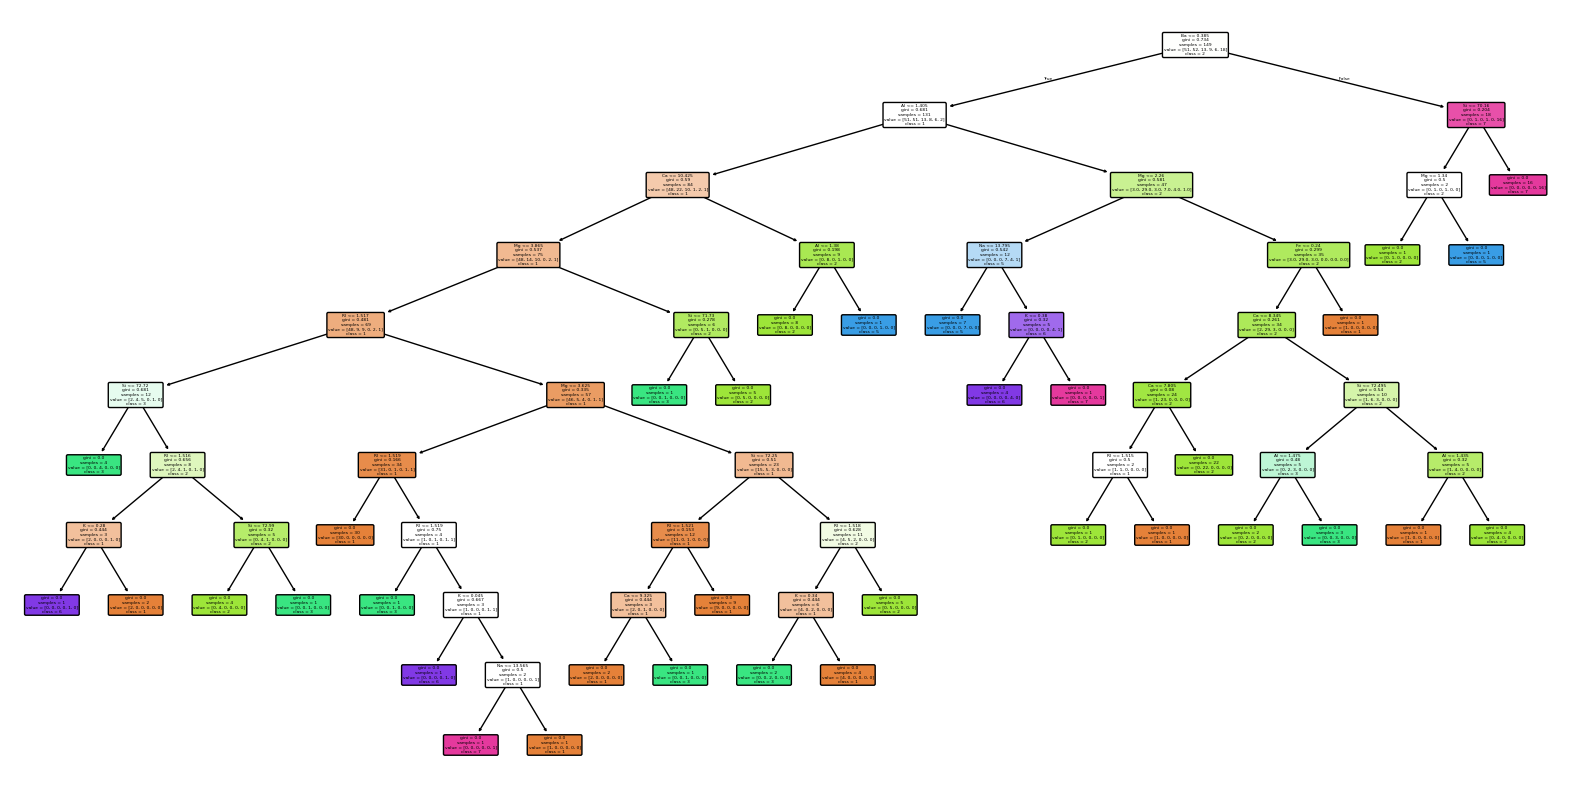

0.65625

In [ ]:
glass_data = pd.read_csv('/content/glass.data')
# Assigning column names to the dataset
columns = ['Id', 'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Glass_Type']
glass_data.columns = columns

# Dropping the 'Id' column since it is not useful for our model
glass_data = glass_data.drop('Id', axis=1)

# Let's now proceed to splitting the data into features (X) and target (y)
X = glass_data.drop('Glass_Type', axis=1)  # Features
y = glass_data['Glass_Type']  # Target variable

# Importing necessary libraries for model training and visualization
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initializing and training the Decision Tree model
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)

# Predicting on the test set
y_pred = decision_tree.predict(X_test)

# Calculating the accuracy
accuracy = accuracy_score(y_test, y_pred)

# Plotting the Decision Tree
plt.figure(figsize=(20,10))
plot_tree(decision_tree, filled=True, feature_names=X.columns, class_names=[str(i) for i in set(y)], rounded=True)
plt.show()

accuracy


Accuracy: 0.6511627906976745


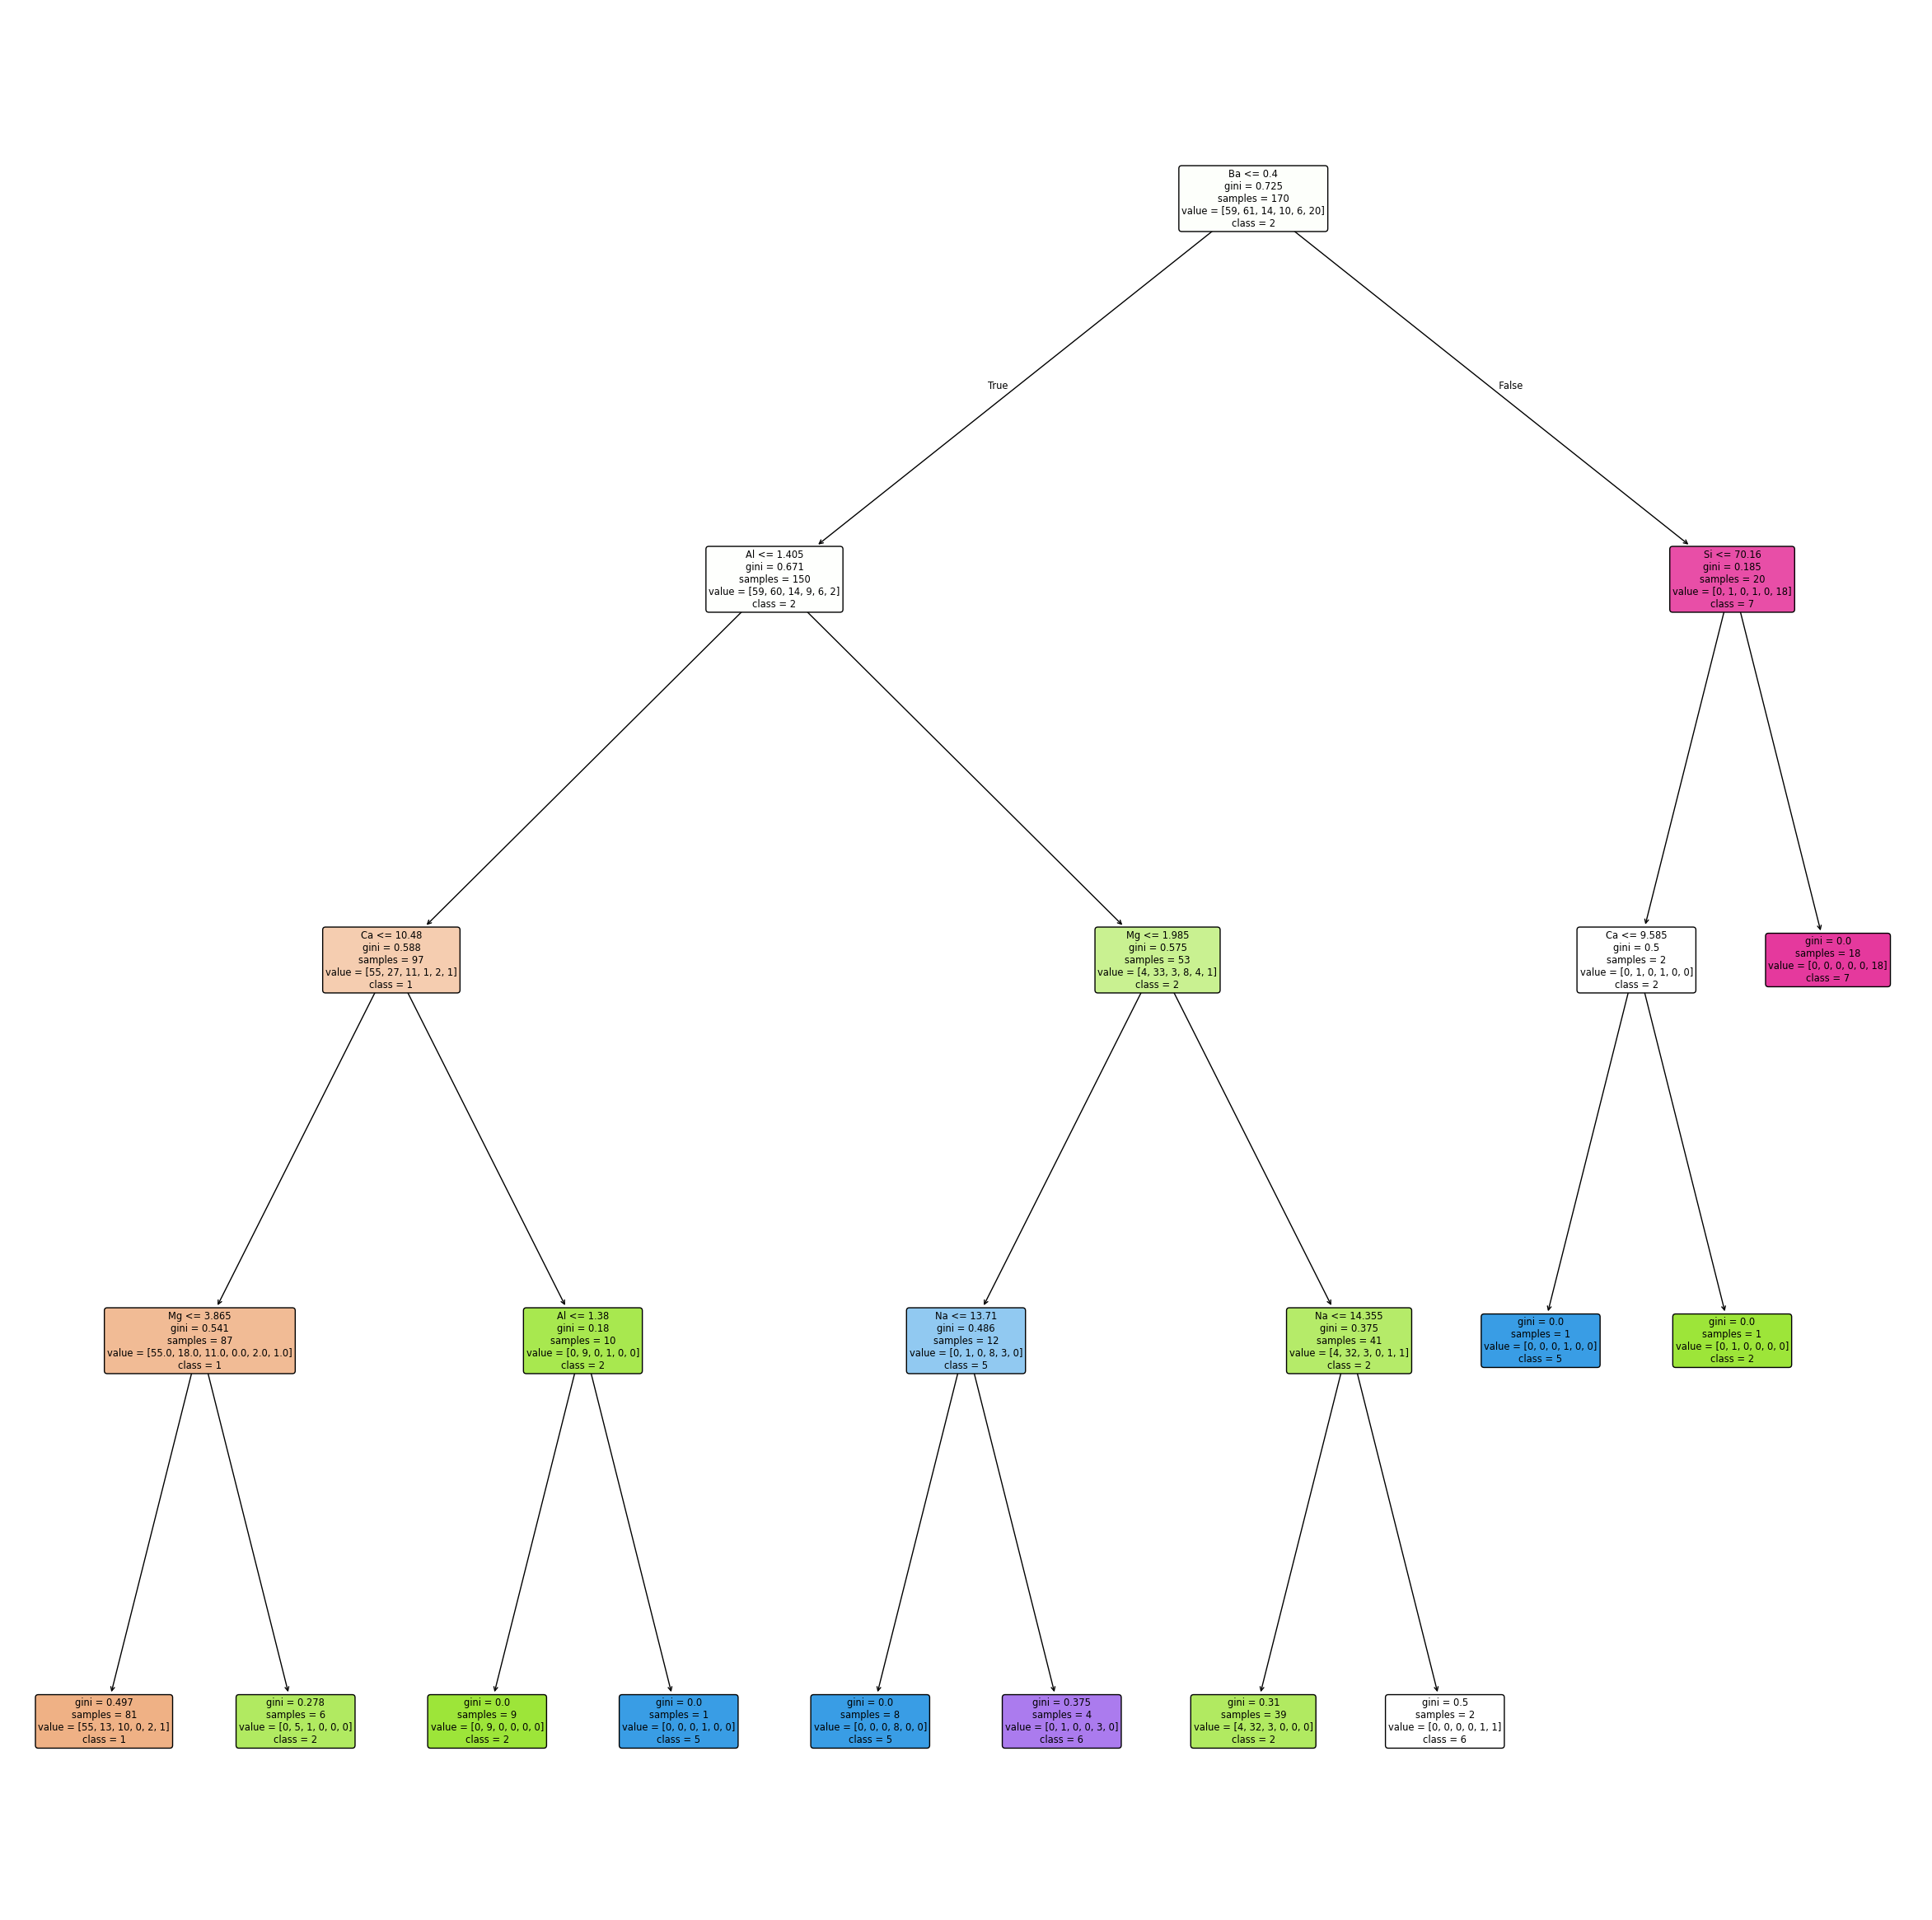

              precision    recall  f1-score   support

           1       0.55      0.60      0.57        10
           2       0.61      0.73      0.67        15
           3       0.00      0.00      0.00         3
           5       0.75      1.00      0.86         3
           6       0.00      0.00      0.00         3
           7       0.89      0.89      0.89         9

    accuracy                           0.65        43
   macro avg       0.47      0.54      0.50        43
weighted avg       0.58      0.65      0.61        43



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/m

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

#

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree Classifier
# criterion='gini' uses Gini Impurity, 'entropy' uses Information Gain
clf = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=42)

# Train the model
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Plot the Decision Tree
plt.figure(figsize=(30,30))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=[str(i) for i in set(y)], rounded=True)
plt.show()

from sklearn.metrics import classification_report
classification_report(y_test, y_pred)
print(classification_report(y_test, y_pred))

Accuracy: 0.7674418604651163


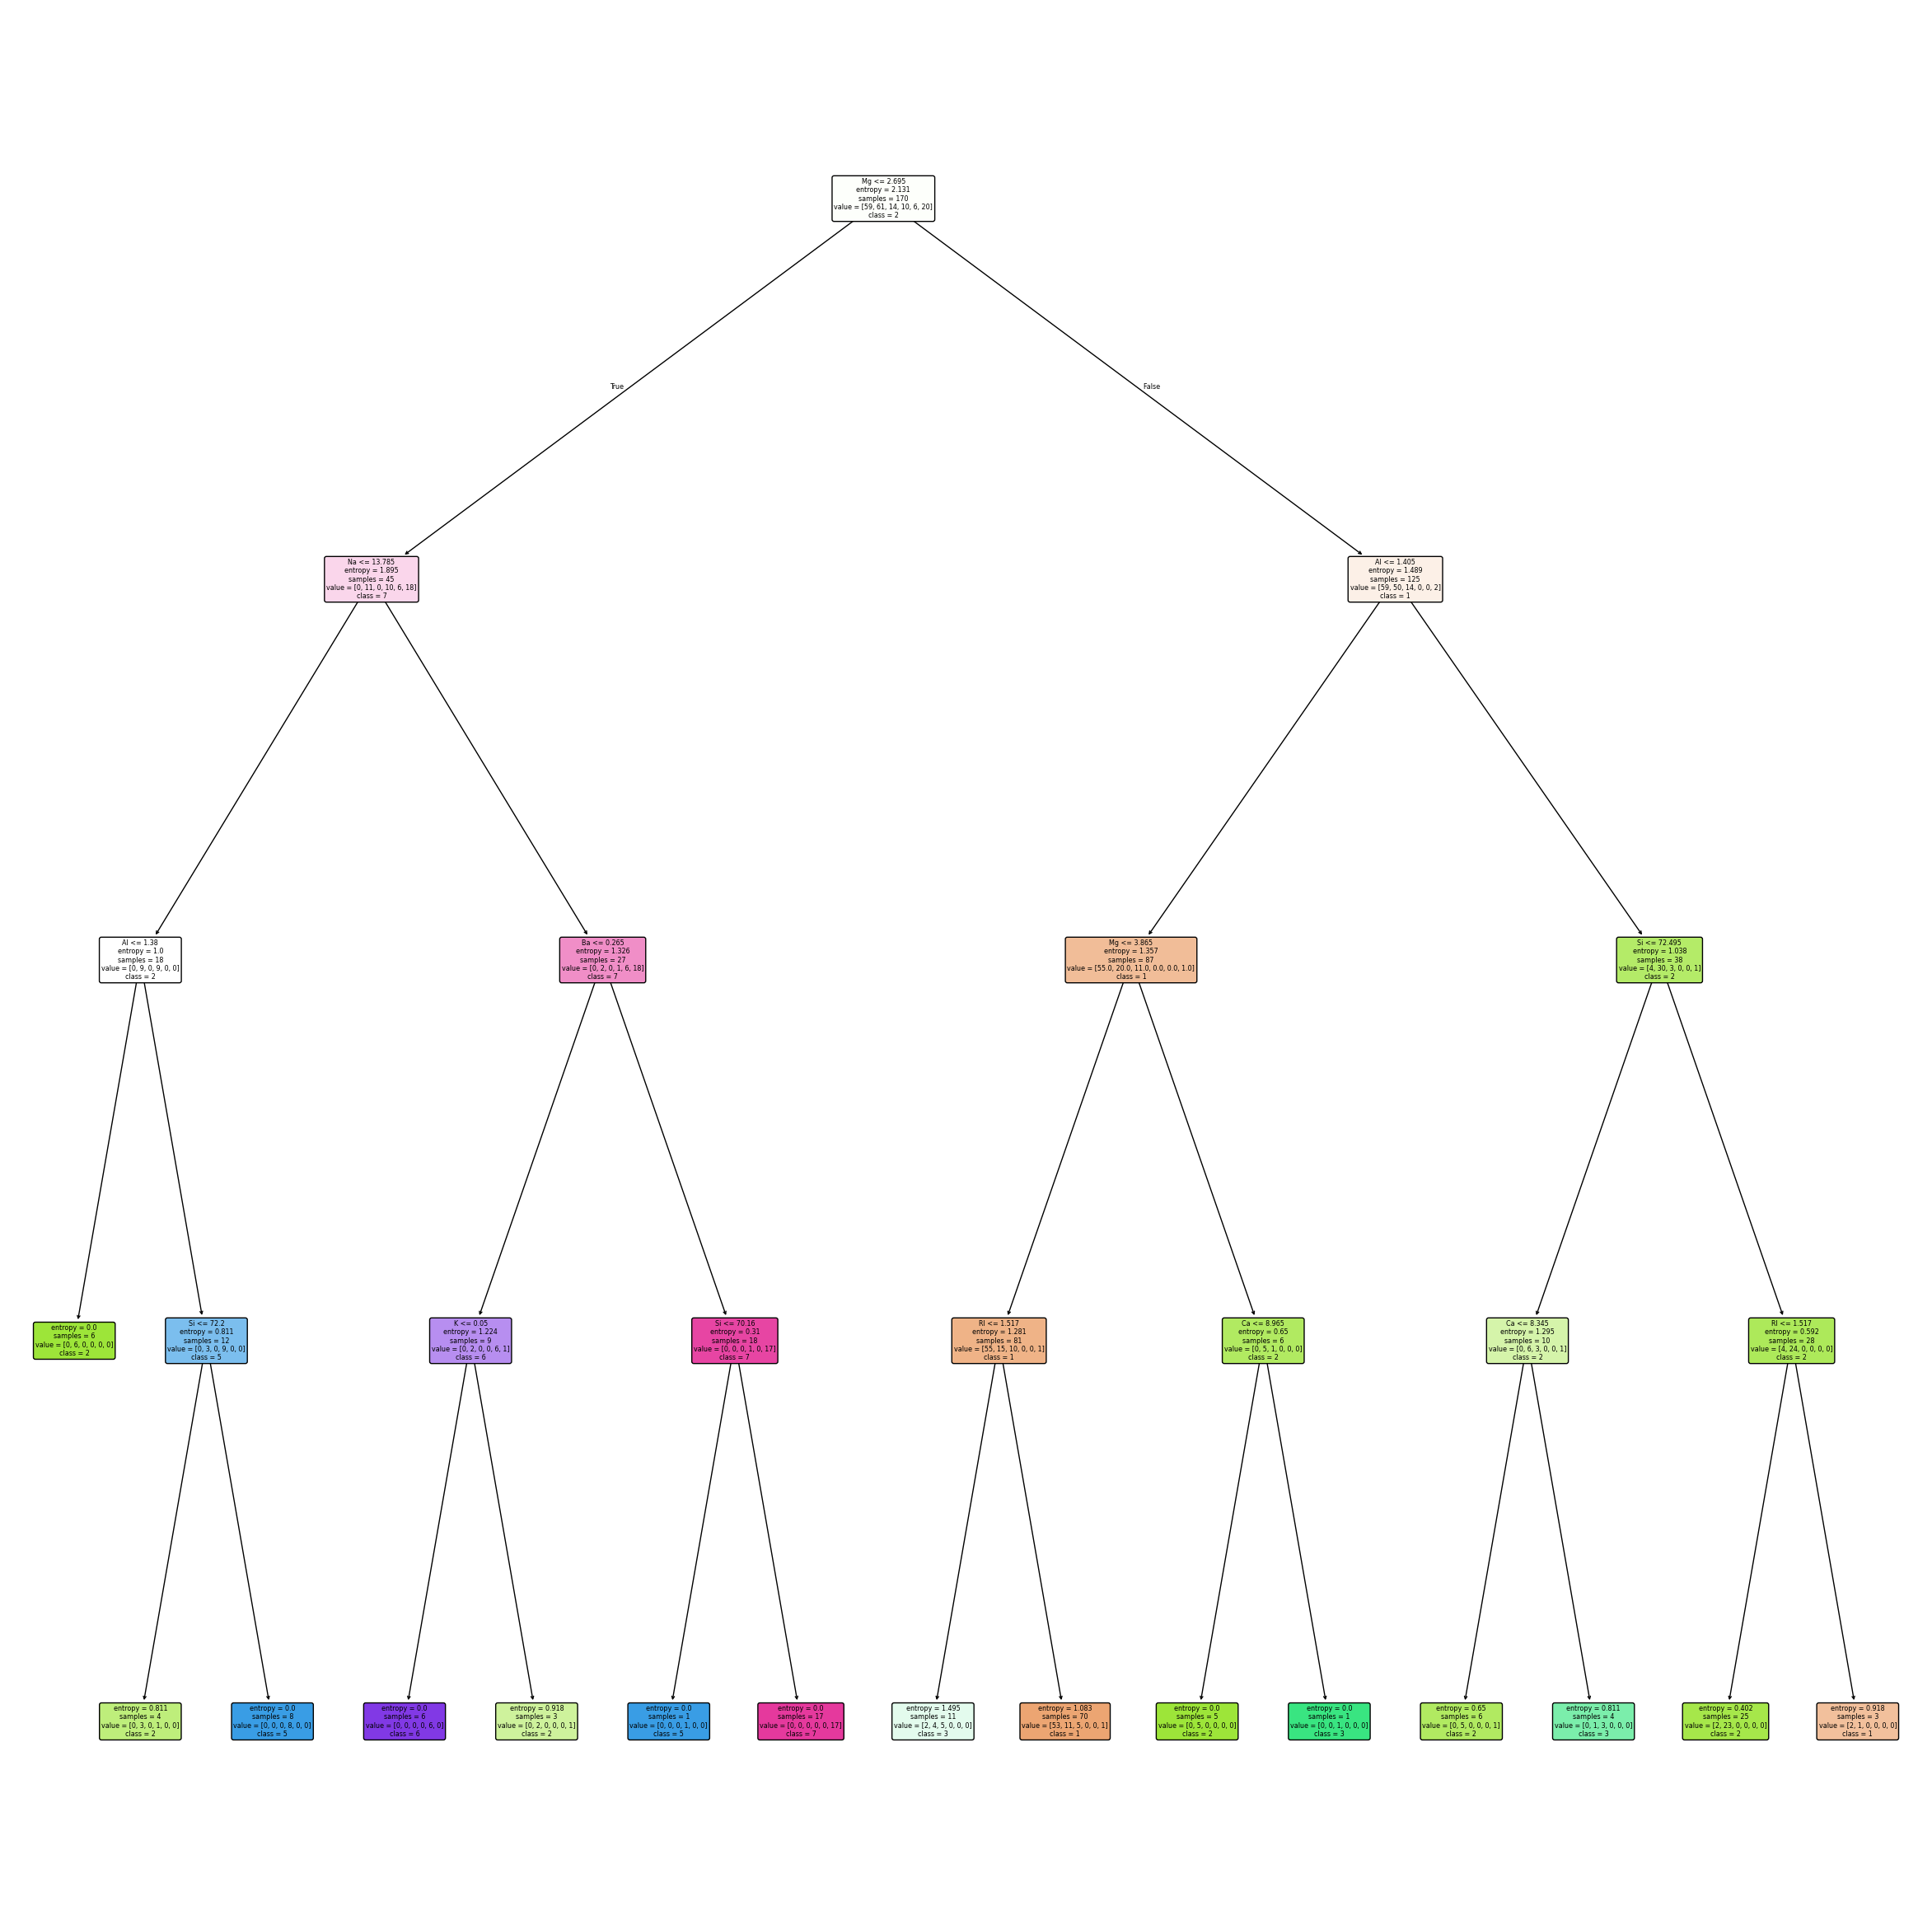

              precision    recall  f1-score   support

           1       0.70      0.70      0.70        10
           2       0.67      0.80      0.73        15
           3       0.75      1.00      0.86         3
           5       1.00      0.33      0.50         3
           6       1.00      1.00      1.00         3
           7       1.00      0.78      0.88         9

    accuracy                           0.77        43
   macro avg       0.85      0.77      0.78        43
weighted avg       0.80      0.77      0.76        43



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

#

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree Classifier
# criterion='gini' uses Gini Impurity, 'entropy' uses Information Gain
clf = DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=42)

# Train the model
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Plot the Decision Tree
plt.figure(figsize=(30,30))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=[str(i) for i in set(y)], rounded=True)
plt.show()
from sklearn.metrics import classification_report
classification_report(y_test, y_pred)
print(classification_report(y_test, y_pred))


# APPLICATION OF RANDOM FOREST AND PRINTING THE 1ST TREE OF THE RANDOMFOREST


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=100, criterion='gini', random_state=42)

# Train the model on the training data
rf_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_model.predict(X_test)

# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Feature importance (which features were important in making predictions)
importances = rf_model.feature_importances_
feature_names = X.columns

# Display feature importance
print("Feature Importances:")
for feature, importance in zip(feature_names, importances):
    print(f"{feature}: {importance:.4f}")

Accuracy: 72.09%
Classification Report:
              precision    recall  f1-score   support

           1       0.70      0.70      0.70        10
           2       0.60      0.80      0.69        15
           3       1.00      0.67      0.80         3
           5       0.50      0.33      0.40         3
           6       1.00      0.67      0.80         3
           7       1.00      0.78      0.88         9

    accuracy                           0.72        43
   macro avg       0.80      0.66      0.71        43
weighted avg       0.76      0.72      0.72        43

Feature Importances:
RI: 0.1377
Na: 0.1196
Mg: 0.1620
Al: 0.1555
Si: 0.0938
K: 0.0774
Ca: 0.1376
Ba: 0.0729
Fe: 0.0434


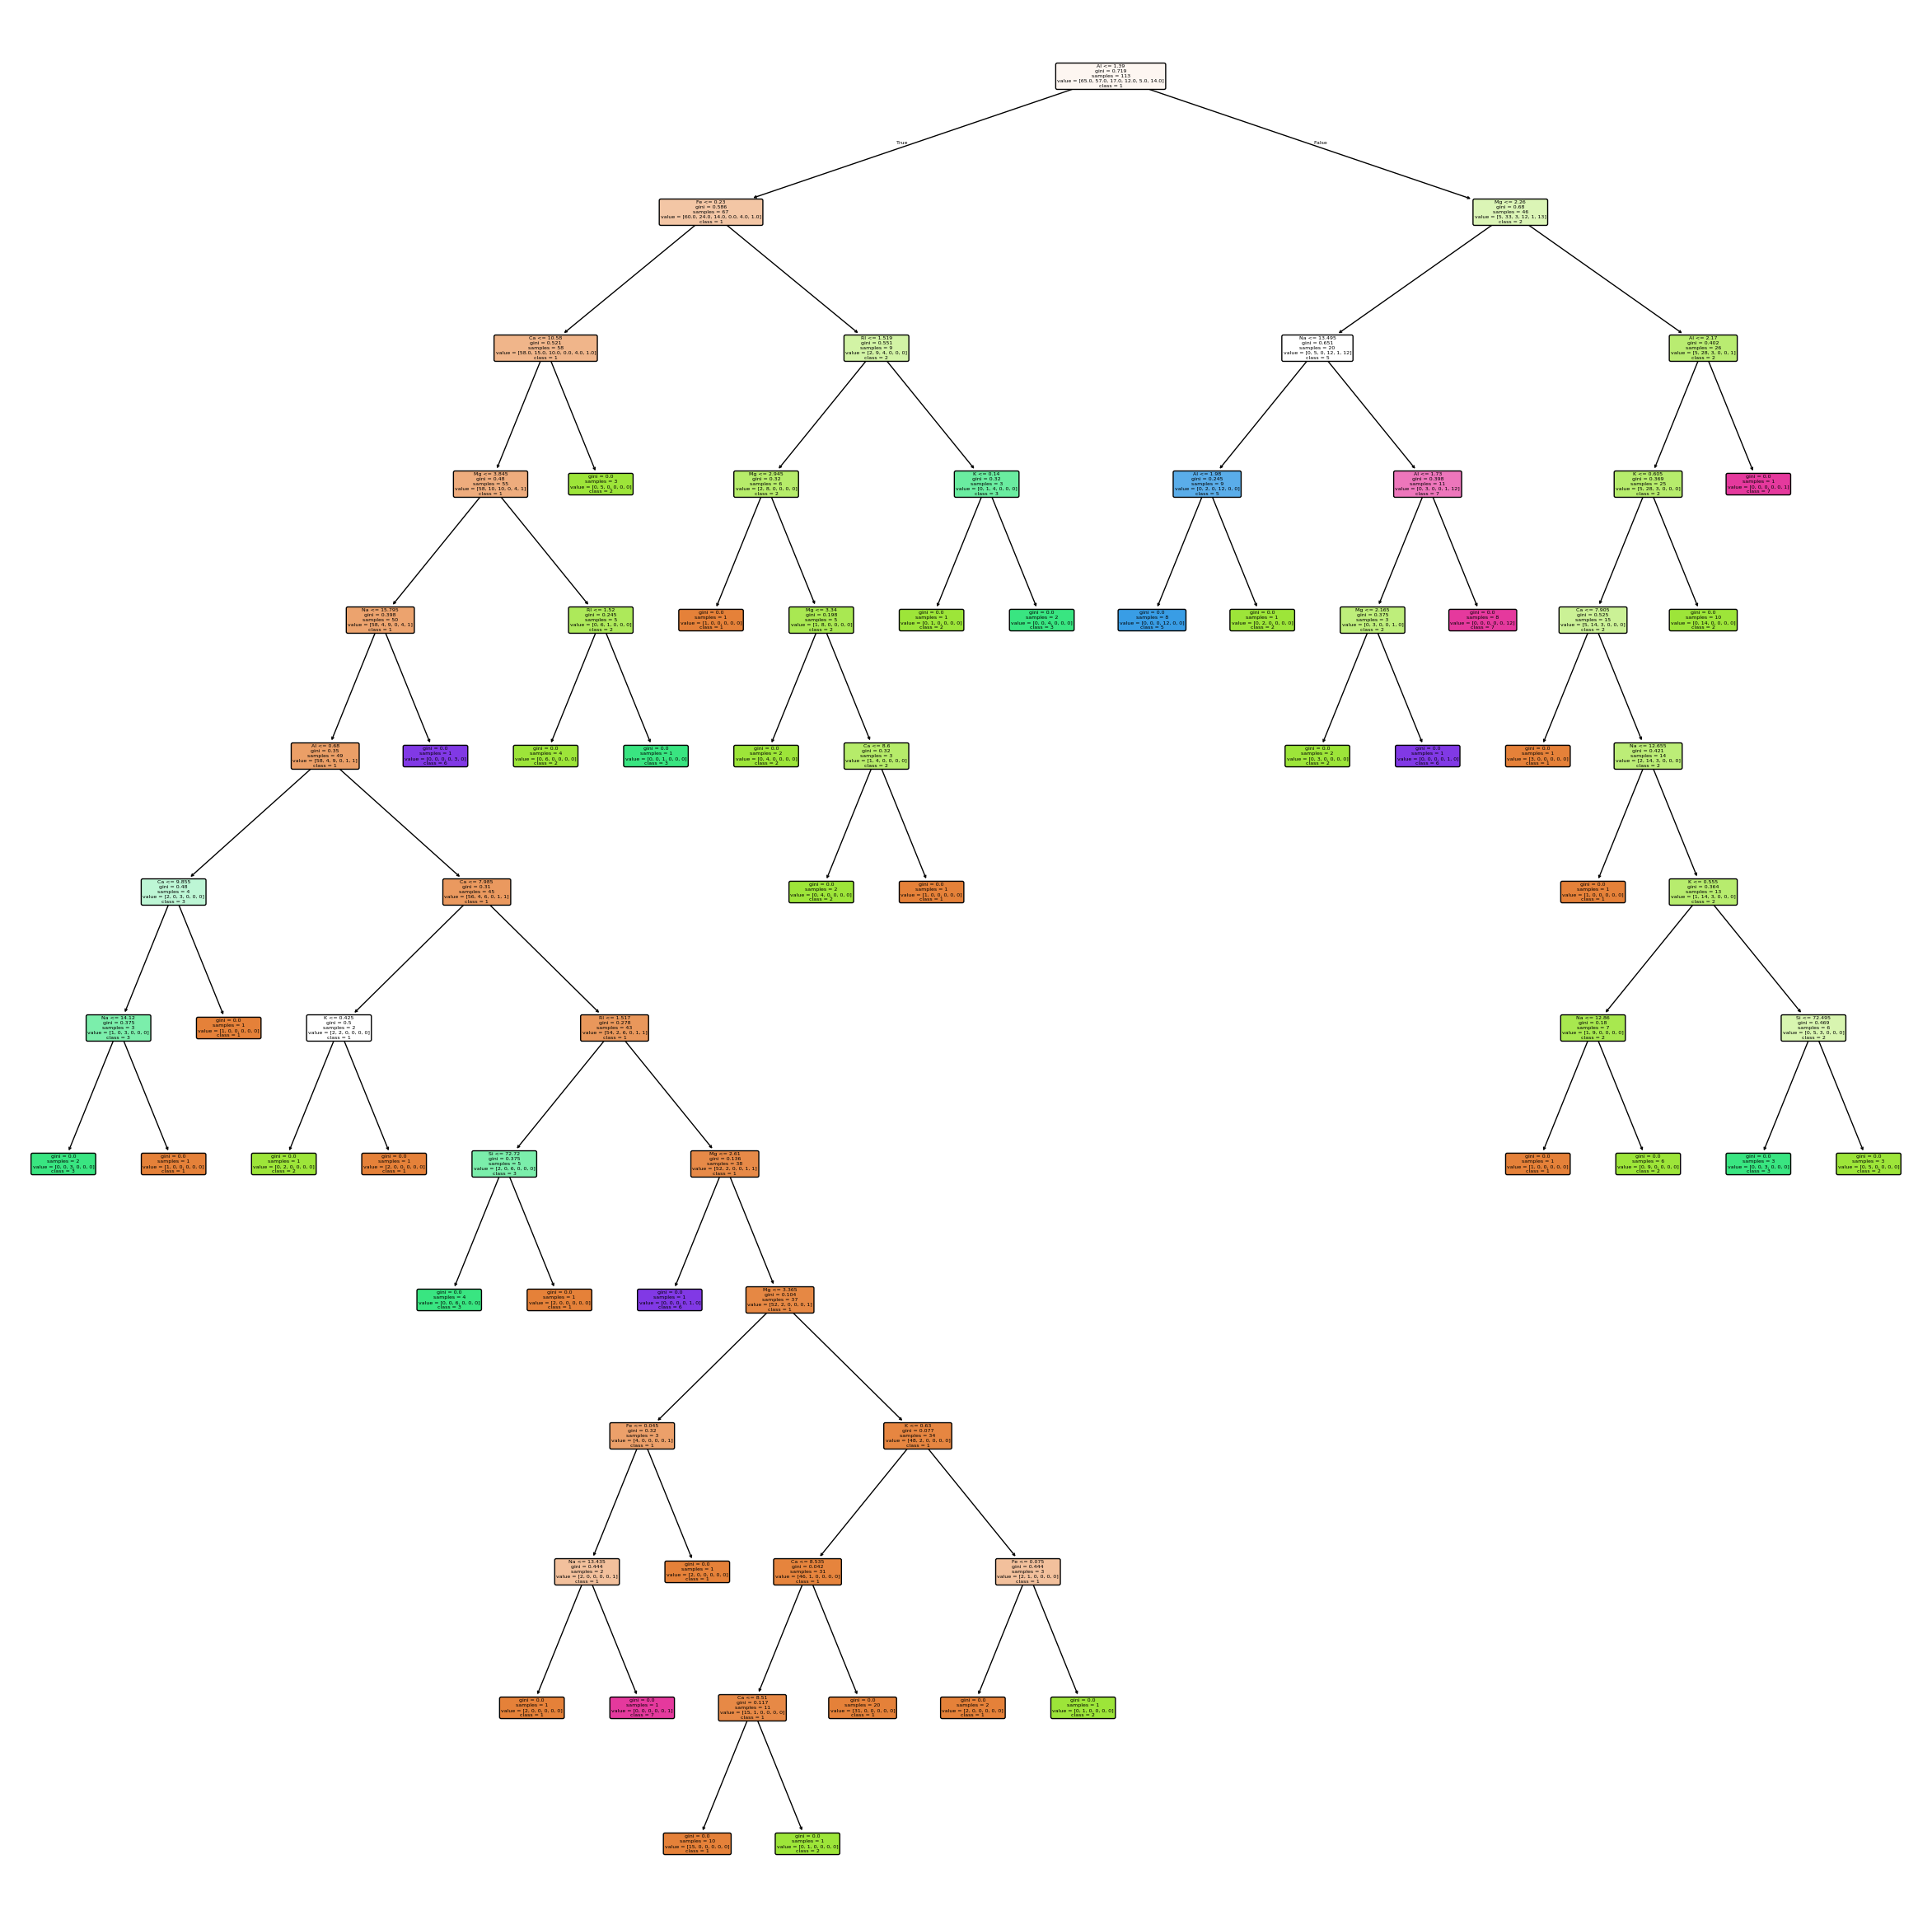

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Assuming you have already trained the Random Forest model (rf_model)
# Extract one tree from the Random Forest
single_tree = rf_model.estimators_[0]  # Extract the first tree (you can choose any tree)

# Plot the single decision tree
plt.figure(figsize=(30,30))
plot_tree(single_tree, filled=True, feature_names=X.columns, class_names=[str(i) for i in set(y)], rounded=True)
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=42)

# Train the model on the training data
rf_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_model.predict(X_test)

# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Feature importance (which features were important in making predictions)
importances = rf_model.feature_importances_
feature_names = X.columns

# Display feature importance
print("Feature Importances:")
for feature, importance in zip(feature_names, importances):
    print(f"{feature}: {importance:.4f}")


Accuracy: 79.07%
Classification Report:
              precision    recall  f1-score   support

           1       0.73      0.80      0.76        10
           2       0.71      0.80      0.75        15
           3       1.00      0.67      0.80         3
           5       0.75      1.00      0.86         3
           6       1.00      0.67      0.80         3
           7       1.00      0.78      0.88         9

    accuracy                           0.79        43
   macro avg       0.86      0.79      0.81        43
weighted avg       0.82      0.79      0.79        43

Feature Importances:
RI: 0.1238
Na: 0.1364
Mg: 0.2357
Al: 0.1429
Si: 0.0800
K: 0.0756
Ca: 0.1210
Ba: 0.0560
Fe: 0.0286



Random Forest Performance Metrics:
--------------------------------------------------
Total Samples: 43
Correct Predictions: 34
Overall Accuracy: 79.07%

Per-class Metrics:
--------------------------------------------------

Class: 1
Precision: 72.73%
Recall: 80.00%
F1-Score: 76.19%
Support: 10

Class: 2
Precision: 70.59%
Recall: 80.00%
F1-Score: 75.00%
Support: 15

Class: 3
Precision: 100.00%
Recall: 66.67%
F1-Score: 80.00%
Support: 3

Class: 5
Precision: 75.00%
Recall: 100.00%
F1-Score: 85.71%
Support: 3

Class: 6
Precision: 100.00%
Recall: 66.67%
F1-Score: 80.00%
Support: 3

Class: 7
Precision: 100.00%
Recall: 77.78%
F1-Score: 87.50%
Support: 9


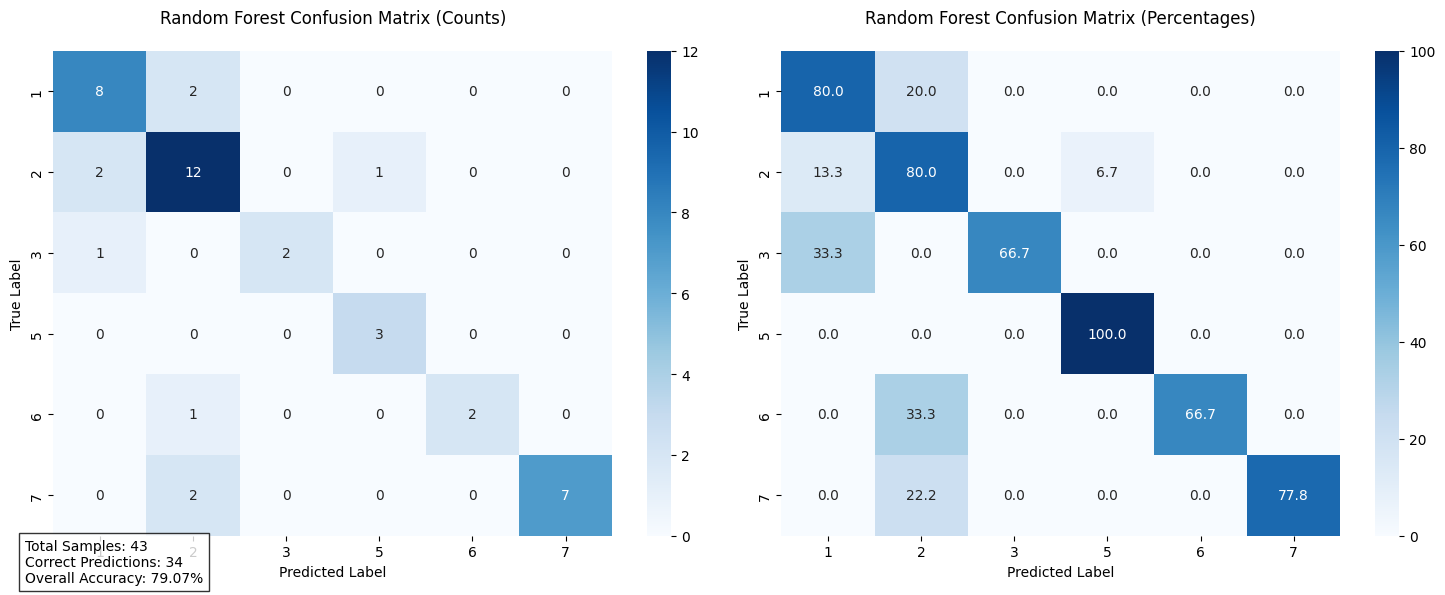

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (10,) and arg 1 with shape (9,).

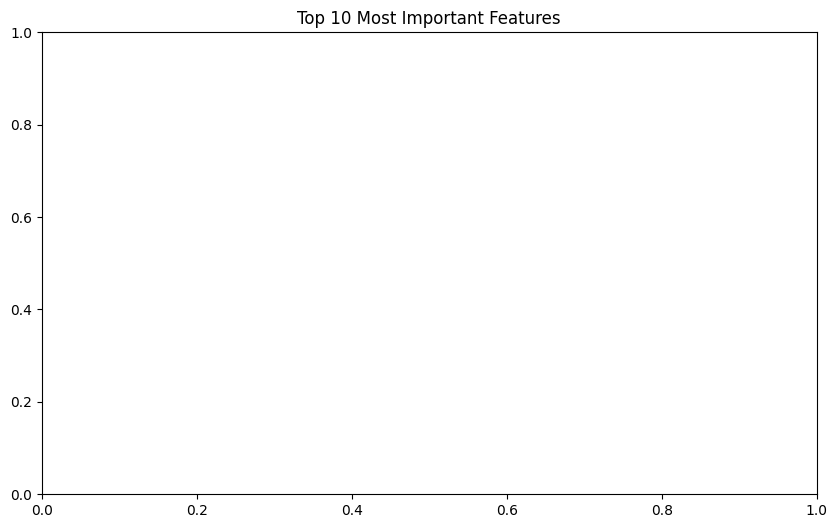

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_rf_confusion_matrices(y_true, y_pred, class_labels=None):
    """
    Plot confusion matrices for Random Forest classifier with counts and percentages.

    Parameters:
    -----------
    y_true : array-like
        True labels
    y_pred : array-like
        Predicted labels from Random Forest
    class_labels : list, optional
        List of class names
    """
    # Create confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    # Calculate percentages
    cm_percent = (cm / cm.sum(axis=1)[:, np.newaxis]) * 100

    # Create figure with two subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

    # Plot counts
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax1,
                xticklabels=class_labels, yticklabels=class_labels)
    ax1.set_title('Random Forest Confusion Matrix (Counts)', pad=20)
    ax1.set_xlabel('Predicted Label')
    ax1.set_ylabel('True Label')

    # Plot percentages
    sns.heatmap(cm_percent, annot=True, fmt='.1f', cmap='Blues', ax=ax2,
                xticklabels=class_labels, yticklabels=class_labels)
    ax2.set_title('Random Forest Confusion Matrix (Percentages)', pad=20)
    ax2.set_xlabel('Predicted Label')
    ax2.set_ylabel('True Label')

    # Add performance metrics
    total_samples = cm.sum()
    correct_predictions = cm.diagonal().sum()
    accuracy = correct_predictions / total_samples

    # Calculate per-class metrics
    precision = np.diag(cm) / np.sum(cm, axis=0)
    recall = np.diag(cm) / np.sum(cm, axis=1)
    f1 = 2 * (precision * recall) / (precision + recall)

    # Add text annotations
    metrics_text = f'Total Samples: {total_samples}\n' \
                  f'Correct Predictions: {correct_predictions}\n' \
                  f'Overall Accuracy: {accuracy:.2%}'
    plt.figtext(0.02, 0.02, metrics_text, fontsize=10,
                bbox=dict(facecolor='white', alpha=0.8))

    plt.tight_layout()

    # Print detailed metrics
    print("\nRandom Forest Performance Metrics:")
    print("-" * 50)
    print(f"Total Samples: {total_samples}")
    print(f"Correct Predictions: {correct_predictions}")
    print(f"Overall Accuracy: {accuracy:.2%}")

    print("\nPer-class Metrics:")
    print("-" * 50)
    for i, label in enumerate(class_labels if class_labels is not None else range(len(cm))):
        print(f"\nClass: {label}")
        print(f"Precision: {precision[i]:.2%}")
        print(f"Recall: {recall[i]:.2%}")
        print(f"F1-Score: {f1[i]:.2%}")
        print(f"Support: {np.sum(cm, axis=1)[i]}")

    return fig

# Now use it with your Random Forest model:
# Get unique class labels if they exist in your dataset
class_labels = np.unique(y) if hasattr(y, 'unique') else None

# Plot confusion matrices
fig = plot_rf_confusion_matrices(y_test, y_pred, class_labels=class_labels)
plt.show()

# Add feature importance visualization
def plot_feature_importance(rf_model, feature_names, top_n=10):
    """
    Plot top N most important features from Random Forest model.
    """
    # Get feature importances
    importances = rf_model.feature_importances_

    # Sort feature importances in descending order
    indices = np.argsort(importances)[::-1]

    # Select top N features
    top_indices = indices[:top_n]
    top_importances = importances[top_indices]
    top_features = feature_names[top_indices]

    # Create figure
    plt.figure(figsize=(10, 6))
    plt.title(f'Top {top_n} Most Important Features')

    # Create bar plot
    bars = plt.bar(range(top_n), top_importances)
    plt.xticks(range(top_n), top_features, rotation=45, ha='right')
    plt.xlabel('Features')
    plt.ylabel('Importance')

    # Add importance values on top of bars
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.4f}',
                ha='center', va='bottom')

    plt.tight_layout()
    return plt.gcf()

# Plot feature importance
fig_importance = plot_feature_importance(rf_model, np.array(feature_names))
plt.show()
# Plot confusion matrices
fig = plot_rf_confusion_matrices(y_test, y_pred, class_labels=np.unique(y))
plt.show()

# Plot feature importance
fig_importance = plot_feature_importance(rf_model, np.array(feature_names))
plt.show()

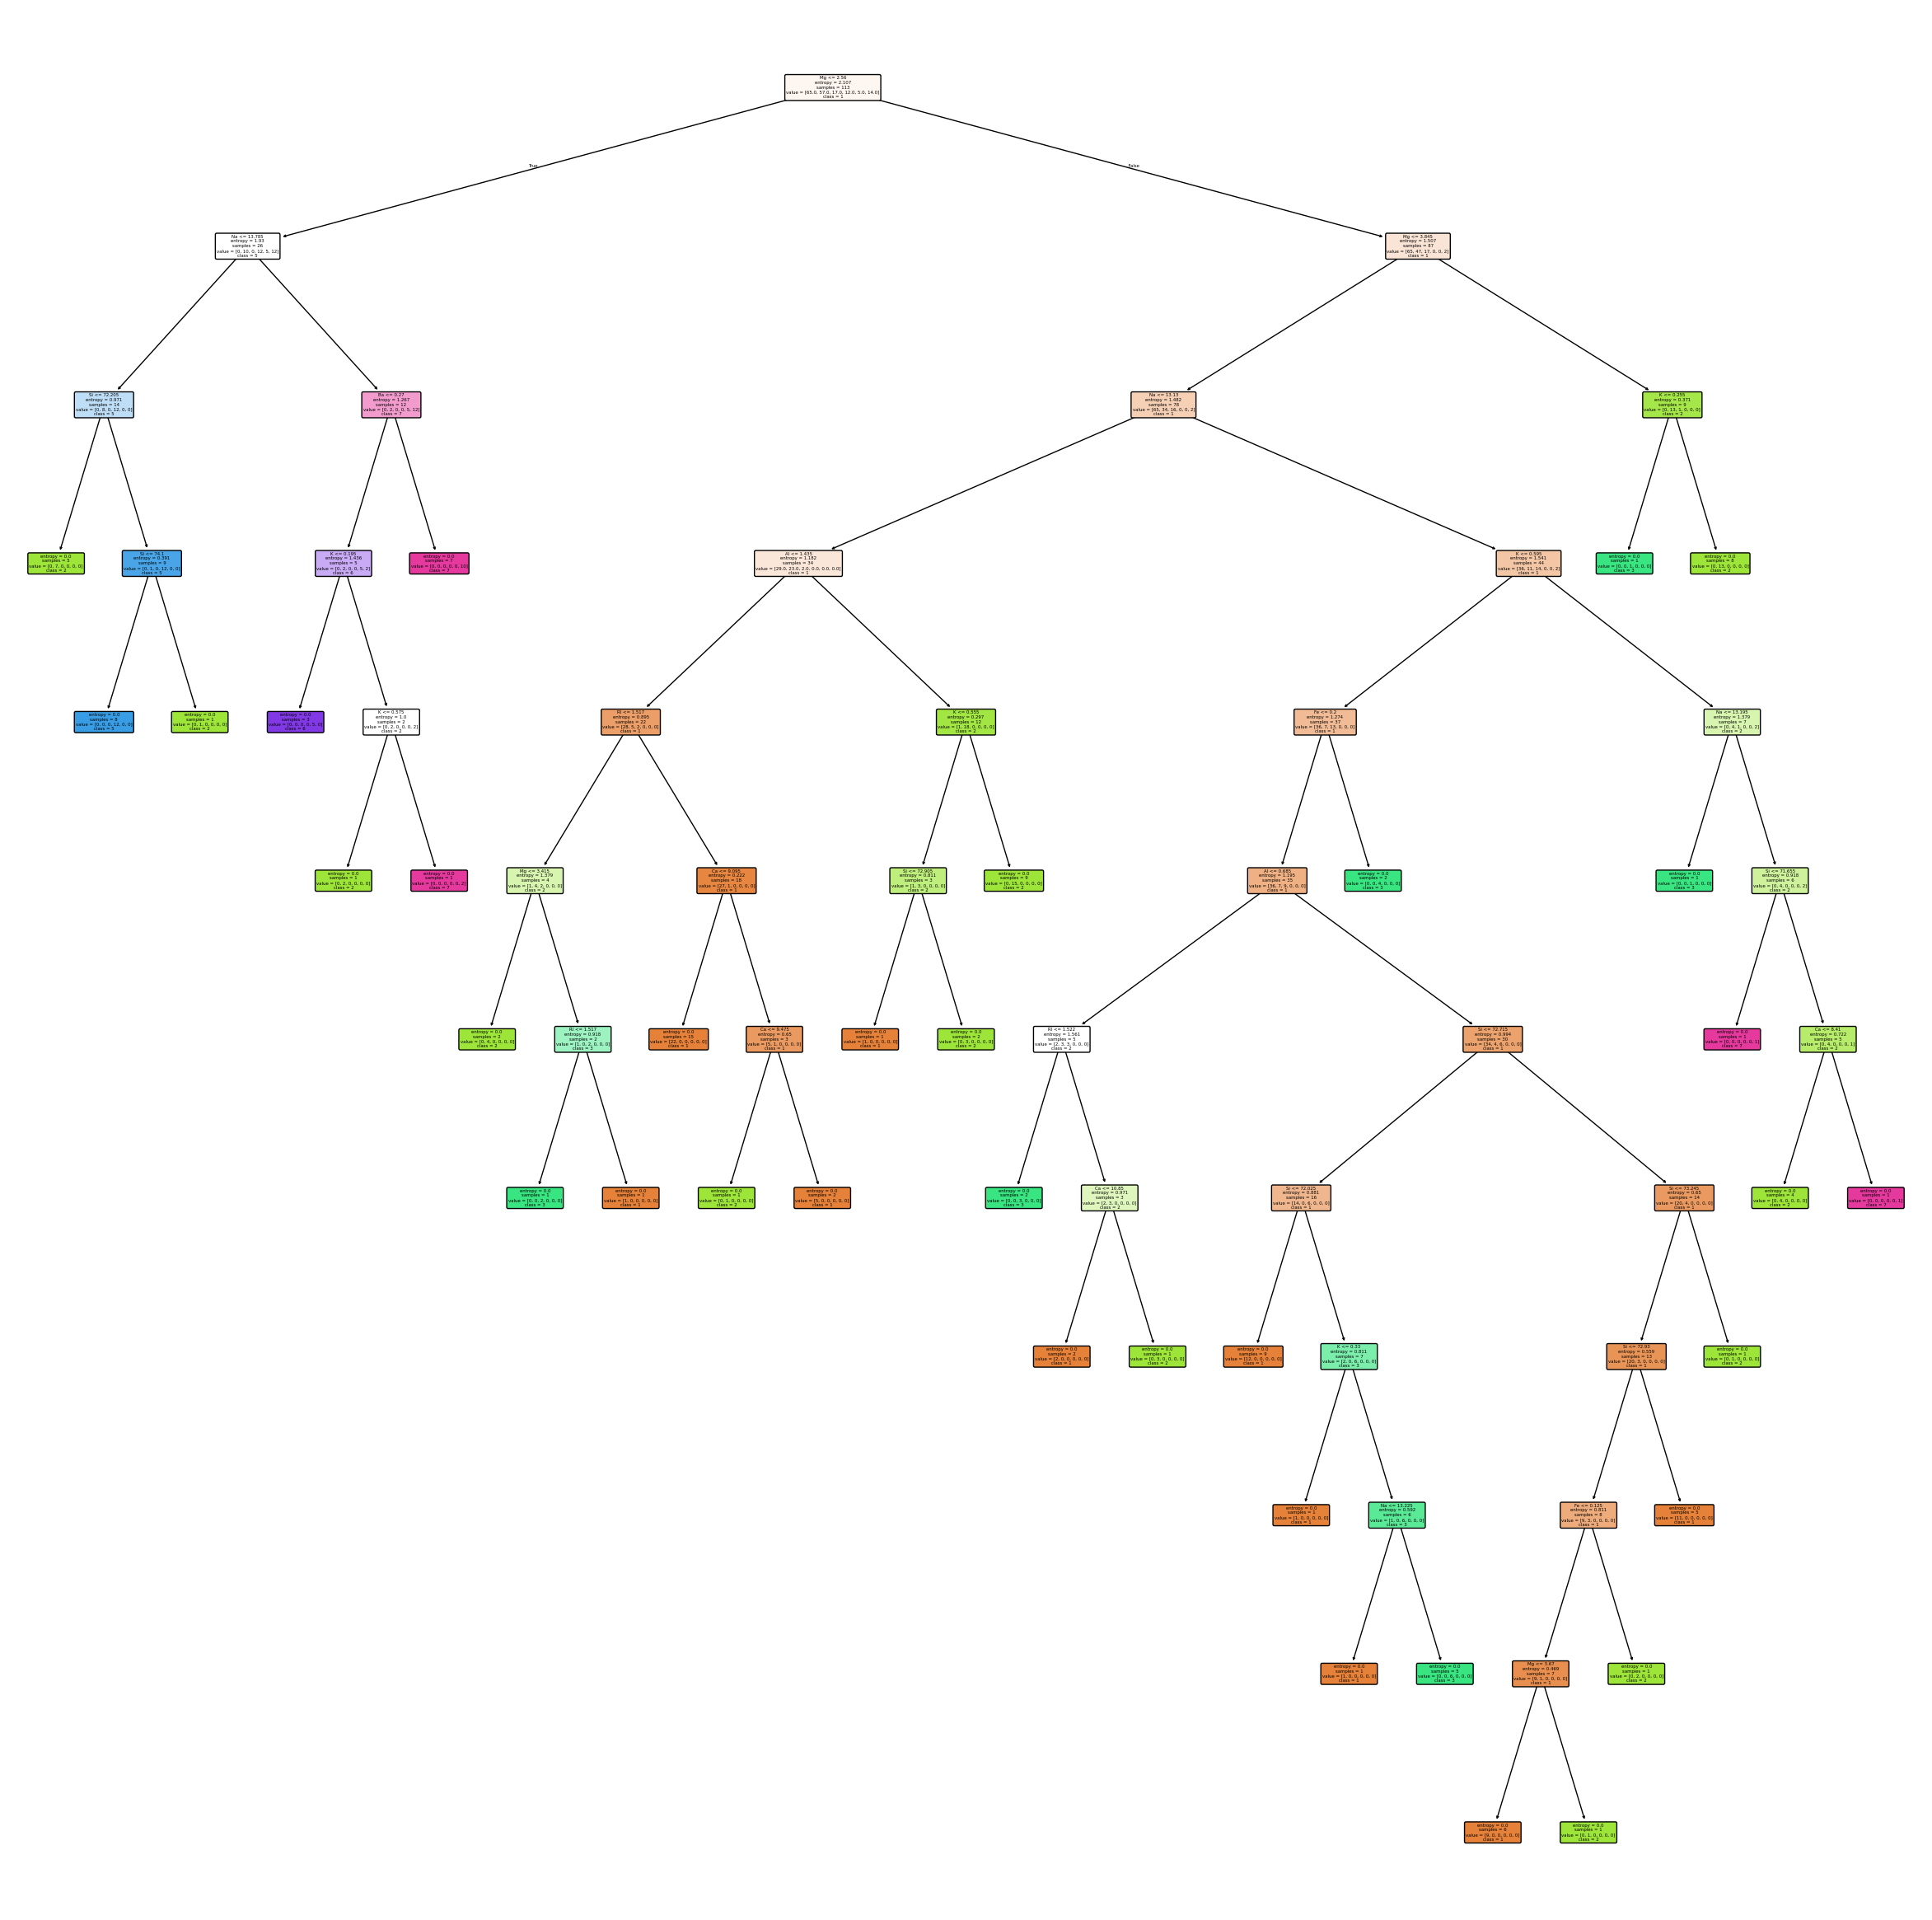

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Assuming you have already trained the Random Forest model (rf_model)
# Extract one tree from the Random Forest
single_tree = rf_model.estimators_[0]  # Extract the first tree (you can choose any tree)

# Plot the single decision tree
plt.figure(figsize=(30,30))
plot_tree(single_tree, filled=True, feature_names=X.columns, class_names=[str(i) for i in set(y)], rounded=True)
plt.show()


Explained variance by each principal component:
PC1: 0.2789
PC2: 0.2284
PC3: 0.1564
PC4: 0.1276
PC5: 0.1017
PC6: 0.0586
PC7: 0.0410
PC8: 0.0071
PC9: 0.0002


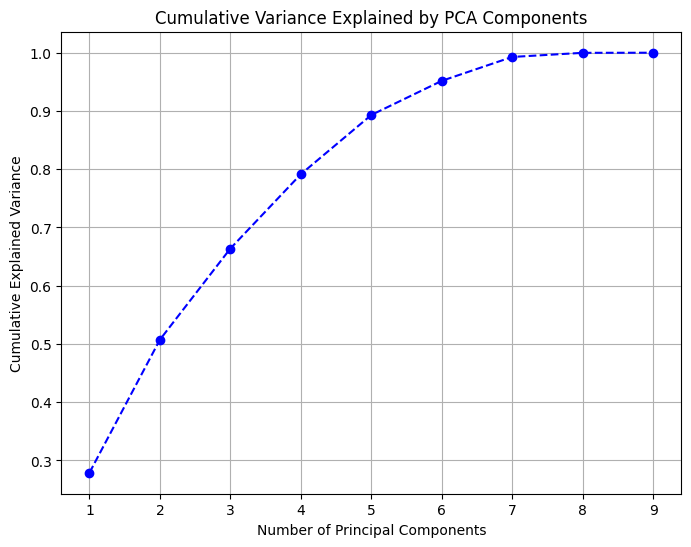

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=None)  # 'None' means all components will be kept for now
X_pca = pca.fit_transform(X_scaled)

# Explained variance ratio (this tells us how much variance is captured by each principal component)
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Print the explained variance by each principal component
print("Explained variance by each principal component:")
for i, var in enumerate(explained_variance, 1):
    print(f"PC{i}: {var:.4f}")

# Plot the cumulative variance to see how many components explain most of the variance
plt.figure(figsize=(8,6))
plt.plot(range(1, len(cumulative_variance)+1), cumulative_variance, marker='o', linestyle='--', color='b')
plt.title('Cumulative Variance Explained by PCA Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()



In [ ]:
from sklearn.ensemble import StackingClassifier

# Define base estimators
estimators = [

    ('dt', DecisionTreeClassifier(random_state=42)),
    ('rf', RandomForestClassifier(random_state=42))
]

# Define the stacking classifier with a meta-model (Logistic Regression)
stacking_clf = StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression(max_iter=1000, random_state=42)
)

# Train and predict with the Stacking model
stacking_clf.fit(X_train, y_train)
stacking_pred = stacking_clf.predict(X_test)
stacking_accuracy = accuracy_score(y_test, stacking_pred)

stacking_accuracy


0.7209302325581395

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reshape the data to 3D for LSTM (samples, timesteps, features)
# Here we treat each feature as a timestep for simplicity
X_reshaped = X_scaled.reshape((X_scaled.shape[0], X_scaled.shape[1], 1))

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_reshaped, y, test_size=0.2, random_state=42)

# Define the LSTM model
lstm_model = Sequential([
    LSTM(50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),
    Dense(25, activation='relu'),
    Dropout(0.2),
    Dense(9, activation='softmax')


])

# Compile the model
lstm_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = lstm_model.fit(X_train, y_train, epochs=30, batch_size=16, validation_split=0.2, verbose=0)

# Evaluate the model
lstm_accuracy = lstm_model.evaluate(X_test, y_test, verbose=0)[1]
lstm_accuracy


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


0.5348837375640869

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=42)

# Train the model on the training data
rf_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_model.predict(X_test)

# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Feature importance (which features were important in making predictions)
importances = rf_model.feature_importances_
feature_names = X.columns

# Display feature importance
print("Feature Importances:")
for feature, importance in zip(feature_names, importances):
    print(f"{feature}: {importance:.4f}")

Accuracy: 79.07%
Classification Report:
              precision    recall  f1-score   support

           1       0.73      0.80      0.76        10
           2       0.71      0.80      0.75        15
           3       1.00      0.67      0.80         3
           5       0.75      1.00      0.86         3
           6       1.00      0.67      0.80         3
           7       1.00      0.78      0.88         9

    accuracy                           0.79        43
   macro avg       0.86      0.79      0.81        43
weighted avg       0.82      0.79      0.79        43

Feature Importances:
RI: 0.1238
Na: 0.1364
Mg: 0.2357
Al: 0.1429
Si: 0.0800
K: 0.0756
Ca: 0.1210
Ba: 0.0560
Fe: 0.0286


In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd
import numpy as np

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the scaled data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Create optimized Random Forest
rf_params = {
    'n_estimators': 200,
    'max_depth': 15,
    'min_samples_split': 5,
    'min_samples_leaf': 2,
    'criterion': 'entropy',
    'random_state': 42,
    'class_weight': 'balanced',
    'bootstrap': True
}
rf_model = RandomForestClassifier(**rf_params)

# Create optimized Gradient Boosting
gb_params = {
    'n_estimators': 200,
    'learning_rate': 0.1,
    'max_depth': 5,
    'min_samples_split': 4,
    'min_samples_leaf': 2,
    'random_state': 42,
    'subsample': 0.8
}
gb_model = GradientBoostingClassifier(**gb_params)

# Create voting classifier
voting_classifier = VotingClassifier(
    estimators=[
        ('rf', rf_model),
        ('gb', gb_model)
    ],
    voting='soft'  # Use probability estimates for voting
)

# Train the voting classifier
voting_classifier.fit(X_train, y_train)

# Make predictions
y_pred = voting_classifier.predict(X_test)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Improved Accuracy: {accuracy * 100:.2f}%")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Get feature importance from Random Forest (as an example)
rf_model.fit(X_train, y_train)
importances = rf_model.feature_importances_
feature_names = X.columns

print("\nFeature Importances:")
for feature, importance in zip(feature_names, importances):
    print(f"{feature}: {importance:.4f}")

Improved Accuracy: 79.07%

Classification Report:
              precision    recall  f1-score   support

           1       0.80      0.80      0.80        10
           2       0.75      0.80      0.77        15
           3       0.67      0.67      0.67         3
           5       0.75      1.00      0.86         3
           6       1.00      0.67      0.80         3
           7       0.88      0.78      0.82         9

    accuracy                           0.79        43
   macro avg       0.81      0.79      0.79        43
weighted avg       0.80      0.79      0.79        43


Feature Importances:
RI: 0.0985
Na: 0.1581
Mg: 0.2450
Al: 0.1071
Si: 0.0698
K: 0.1085
Ca: 0.1193
Ba: 0.0817
Fe: 0.0121


In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.feature_selection import SelectFromModel, mutual_info_classif
from sklearn.metrics import accuracy_score, classification_report
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV
import numpy as np
import pandas as pd

class AdvancedEnsembleClassifier:
    def __init__(self, X, y):
        self.X = X
        self.y = y
        self.best_models = {}
        self.feature_mask = None
        self.n_features = X.shape[1]

    def preprocess_data(self):
        # Combine different scalers
        standard_scaler = StandardScaler()
        robust_scaler = RobustScaler()

        X_standard = standard_scaler.fit_transform(self.X)
        X_robust = robust_scaler.fit_transform(self.X)

        # Combine scaled features
        self.X_processed = np.hstack([X_standard, X_robust])

        # Feature selection using mutual information and Extra Trees
        mi_scores = mutual_info_classif(self.X_processed, self.y)
        n_features_to_select = max(int(self.n_features * 0.8), 1)  # Select at least 80% of features

        selector = SelectFromModel(
            ExtraTreesClassifier(n_estimators=200, random_state=42),
            max_features=n_features_to_select,  # Fixed: using integer instead of 'auto'
            prefit=False
        )
        selector.fit(self.X_processed, self.y)
        self.feature_mask = selector.get_support()
        self.X_processed = selector.transform(self.X_processed)

        return self.X_processed

    def create_voting_classifier(self, X_train, y_train):
        estimators = []

        # Random Forest with different configurations
        rf1 = RandomForestClassifier(
            n_estimators=300, max_depth=15, criterion='entropy',
            class_weight='balanced', random_state=42
        )
        rf2 = RandomForestClassifier(
            n_estimators=400, max_depth=20, criterion='gini',
            class_weight='balanced_subsample', random_state=43
        )
        estimators.extend([('rf1', rf1), ('rf2', rf2)])

        # Gradient Boosting with different configurations
        gb1 = GradientBoostingClassifier(
            n_estimators=300, learning_rate=0.05,
            max_depth=4, subsample=0.8, random_state=42
        )
        gb2 = GradientBoostingClassifier(
            n_estimators=400, learning_rate=0.01,
            max_depth=6, subsample=0.9, random_state=43
        )
        estimators.extend([('gb1', gb1), ('gb2', gb2)])

        # Neural Networks
        mlp = MLPClassifier(
            hidden_layer_sizes=(200, 100, 50),
            learning_rate_init=0.001,
            max_iter=1000,
            early_stopping=True,
            random_state=42
        )
        estimators.append(('mlp', mlp))

        # SVM
        svm = SVC(probability=True, kernel='rbf', C=1.0,
                  class_weight='balanced', random_state=42)
        estimators.append(('svm', svm))

        # Create and train voting classifier
        voting_clf = VotingClassifier(
            estimators=estimators,
            voting='soft',
            n_jobs=-1
        )
        voting_clf.fit(X_train, y_train)
        return voting_clf

    def train_models(self):
        # Preprocess data
        X_processed = self.preprocess_data()

        # Split data with stratification
        X_train, X_test, y_train, y_test = train_test_split(
            X_processed, self.y, test_size=0.2, random_state=42, stratify=self.y
        )

        print("Training Voting Classifier...")
        self.voting_classifier = self.create_voting_classifier(X_train, y_train)

        # Create meta-features using voting classifier predictions
        meta_features_train = self.voting_classifier.predict_proba(X_train)
        meta_features_test = self.voting_classifier.predict_proba(X_test)

        # Train meta-classifier
        print("Training Meta Classifier...")
        self.meta_classifier = LogisticRegression(
            C=1.0,
            class_weight='balanced',
            max_iter=1000,
            random_state=42
        )
        self.meta_classifier.fit(meta_features_train, y_train)

        # Make final predictions
        final_pred = self.predict(X_test)

        # Print results
        print("\nFinal Results:")
        print(f"Accuracy: {accuracy_score(y_test, final_pred) * 100:.2f}%")
        print("\nClassification Report:")
        print(classification_report(y_test, final_pred))

        # Perform stratified cross-validation
        cv_scores = cross_val_score(
            self.voting_classifier, X_processed, self.y,
            cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
            scoring='accuracy'
        )
        print(f"\nCross-validation accuracy: {cv_scores.mean()*100:.2f}% (+/- {cv_scores.std()*2*100:.2f}%)")

        return X_test, y_test

    def predict(self, X):
        # Generate meta-features using voting classifier
        meta_features = self.voting_classifier.predict_proba(X)

        # Make final prediction using meta-classifier
        return self.meta_classifier.predict(meta_features)

# Train the advanced ensemble
print("Initializing Advanced Ensemble Classifier...")
ensemble = AdvancedEnsembleClassifier(X, y)
X_test, y_test = ensemble.train_models()

# Get feature importances from the first Random Forest in the voting classifier
rf_model = ensemble.voting_classifier.named_estimators_['rf1']
importances = rf_model.feature_importances_
selected_features = X.columns[ensemble.feature_mask]

print("\nTop Feature Importances:")
for feature, importance in sorted(zip(selected_features, importances),
                                key=lambda x: x[1], reverse=True)[:10]:
    print(f"{feature}: {importance:.4f}")

Initializing Advanced Ensemble Classifier...
Training Voting Classifier...
Training Meta Classifier...

Final Results:
Accuracy: 79.07%

Classification Report:
              precision    recall  f1-score   support

           1       0.85      0.79      0.81        14
           2       0.73      0.73      0.73        15
           3       0.75      1.00      0.86         3
           5       0.75      1.00      0.86         3
           6       0.50      0.50      0.50         2
           7       1.00      0.83      0.91         6

    accuracy                           0.79        43
   macro avg       0.76      0.81      0.78        43
weighted avg       0.80      0.79      0.79        43


Cross-validation accuracy: 76.54% (+/- 6.96%)


IndexError: boolean index did not match indexed array along dimension 0; dimension is 9 but corresponding boolean dimension is 18

In [ ]:
!pip install dask[dataframe]

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler, RobustScaler, PolynomialFeatures
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.feature_selection import SelectFromModel, mutual_info_classif
from sklearn.metrics import accuracy_score, classification_report
from sklearn.calibration import CalibratedClassifierCV
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV
import xgboost as xgb
import lightgbm as lgb
from scipy.stats import skew, kurtosis

class AdvancedEnsembleClassifier:
    def __init__(self, X, y):
        self.X = X
        self.y = y
        self.best_models = {}
        self.feature_mask = None
        self.n_features = X.shape[1]
        self.calibrated_models = {}
        self.thresholds = {}

    def create_interaction_features(self, X):
        # Create interaction terms between important features
        poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
        return poly.fit_transform(X)

    def create_statistical_features(self, X):
        # Create statistical features
        stats_features = []

        # Rolling statistics for each feature
        for i in range(X.shape[1]):
            stats_features.append(pd.Series(X[:, i]).rolling(window=3).mean().fillna(0))
            stats_features.append(pd.Series(X[:, i]).rolling(window=3).std().fillna(0))

        # Add skewness and kurtosis
        stats_features.append(pd.DataFrame(X).apply(skew, axis=1))
        stats_features.append(pd.DataFrame(X).apply(kurtosis, axis=1))

        return np.column_stack([X] + [f.values.reshape(-1, 1) for f in stats_features])

    def preprocess_data(self):
        # Basic scaling
        standard_scaler = StandardScaler()
        robust_scaler = RobustScaler()

        X_standard = standard_scaler.fit_transform(self.X)
        X_robust = robust_scaler.fit_transform(self.X)

        # Create advanced features
        X_interact = self.create_interaction_features(X_standard)
        X_stats = self.create_statistical_features(X_standard)

        # Combine all features
        self.X_processed = np.hstack([X_standard, X_robust, X_interact, X_stats])

        # Feature selection using mutual information and importance-based selection
        mi_scores = mutual_info_classif(self.X_processed, self.y)
        n_features_to_select = max(int(self.X_processed.shape[1] * 0.8), 1)

        selector = SelectFromModel(
            xgb.XGBClassifier(n_estimators=100, random_state=42),
            max_features=n_features_to_select,
            prefit=False
        )
        selector.fit(self.X_processed, self.y)
        self.feature_mask = selector.get_support()
        self.X_processed = selector.transform(self.X_processed)

        return self.X_processed

    def optimize_thresholds(self, X_val, y_val, model):
        # Optimize prediction thresholds for each class
        proba = model.predict_proba(X_val)
        best_thresholds = {}

        for i in range(proba.shape[1]):
            best_acc = 0
            best_threshold = 0.5

            for threshold in np.arange(0.3, 0.7, 0.01):
                pred = (proba[:, i] >= threshold).astype(int)
                acc = accuracy_score(y_val == i, pred)

                if acc > best_acc:
                    best_acc = acc
                    best_threshold = threshold

            best_thresholds[i] = best_threshold

        return best_thresholds

    def create_voting_classifier(self, X_train, y_train, X_val, y_val):
        estimators = []

        # XGBoost models
        xgb1 = xgb.XGBClassifier(
            n_estimators=400,
            learning_rate=0.05,
            max_depth=6,
            subsample=0.8,
            colsample_bytree=0.8,
            random_state=42
        )
        xgb2 = xgb.XGBClassifier(
            n_estimators=400,
            learning_rate=0.01,
            max_depth=8,
            subsample=0.9,
            colsample_bytree=0.9,
            random_state=43
        )

        # LightGBM models
        lgb1 = lgb.LGBMClassifier(
            n_estimators=400,
            learning_rate=0.05,
            num_leaves=31,
            subsample=0.8,
            colsample_bytree=0.8,
            random_state=42
        )
        lgb2 = lgb.LGBMClassifier(
            n_estimators=400,
            learning_rate=0.01,
            num_leaves=63,
            subsample=0.9,
            colsample_bytree=0.9,
            random_state=43
        )

        # Random Forest and Gradient Boosting
        rf = RandomForestClassifier(
            n_estimators=400,
            max_depth=15,
            class_weight='balanced',
            random_state=42
        )
        gb = GradientBoostingClassifier(
            n_estimators=400,
            learning_rate=0.05,
            max_depth=6,
            subsample=0.8,
            random_state=42
        )

        # Neural Network
        mlp = MLPClassifier(
            hidden_layer_sizes=(200, 100, 50),
            learning_rate_init=0.001,
            max_iter=1000,
            early_stopping=True,
            random_state=42
        )

        # Add all base models
        estimators.extend([
            ('xgb1', xgb1), ('xgb2', xgb2),
            ('lgb1', lgb1), ('lgb2', lgb2),
            ('rf', rf), ('gb', gb),
            ('mlp', mlp)
        ])

        # Train and calibrate each model
        for name, model in estimators:
            print(f"Training and calibrating {name}...")
            calibrated_model = CalibratedClassifierCV(
                model, cv=3, method='isotonic'
            )
            calibrated_model.fit(X_train, y_train)
            self.calibrated_models[name] = calibrated_model

            # Optimize thresholds
            self.thresholds[name] = self.optimize_thresholds(X_val, y_val, calibrated_model)

        # Create voting classifier with calibrated models
        voting_clf = VotingClassifier(
            estimators=[(name, model) for name, model in self.calibrated_models.items()],
            voting='soft',
            n_jobs=-1
        )
        voting_clf.fit(X_train, y_train)
        return voting_clf

    def train_models(self):
        # Preprocess data with advanced feature engineering
        print("Preprocessing data and engineering features...")
        X_processed = self.preprocess_data()

        # Split data into train, validation, and test sets
        X_train, X_temp, y_train, y_temp = train_test_split(
            X_processed, self.y, test_size=0.3, random_state=42, stratify=self.y
        )
        X_val, X_test, y_val, y_test = train_test_split(
            X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
        )

        print("Training and calibrating models...")
        self.voting_classifier = self.create_voting_classifier(X_train, y_train, X_val, y_val)

        # Train meta-classifier
        print("Training meta classifier...")
        meta_features_train = np.hstack([
            model.predict_proba(X_train)
            for model in self.calibrated_models.values()
        ])
        meta_features_test = np.hstack([
            model.predict_proba(X_test)
            for model in self.calibrated_models.values()
        ])

        self.meta_classifier = LogisticRegression(
            C=1.0,
            class_weight='balanced',
            max_iter=1000,
            random_state=42
        )
        self.meta_classifier.fit(meta_features_train, y_train)

        # Make final predictions
        final_pred = self.predict(X_test)

        print("\nFinal Results:")
        print(f"Accuracy: {accuracy_score(y_test, final_pred) * 100:.2f}%")
        print("\nClassification Report:")
        print(classification_report(y_test, final_pred))

        return X_test, y_test

    def predict(self, X):
        # Generate meta-features using calibrated models
        meta_features = np.hstack([
            model.predict_proba(X)
            for model in self.calibrated_models.values()
        ])

        # Get predictions using meta-classifier
        return self.meta_classifier.predict(meta_features)

# Train the enhanced ensemble
print("Initializing Advanced Ensemble Classifier...")
ensemble = AdvancedEnsembleClassifier(X, y)
X_test, y_test = ensemble.train_models()

# Feature importance analysis from XGBoost
xgb_model = ensemble.calibrated_models['xgb1'].estimator
importances = xgb_model.feature_importances_
selected_features = X.columns[ensemble.feature_mask]

print("\nTop Feature Importances:")
for feature, importance in sorted(zip(selected_features, importances),
                                key=lambda x: x[1], reverse=True)[:10]:
    print(f"{feature}: {importance:.4f}")

Initializing Advanced Ensemble Classifier...
Preprocessing data and engineering features...


ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0 1 2 3 4 5], got [1 2 3 5 6 7]

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler, RobustScaler, PolynomialFeatures, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.feature_selection import SelectFromModel, mutual_info_classif
from sklearn.metrics import accuracy_score, classification_report
from sklearn.calibration import CalibratedClassifierCV
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV
import xgboost as xgb
import lightgbm as lgb
from scipy.stats import skew, kurtosis

class AdvancedEnsembleClassifier:
    def __init__(self, X, y):
        self.X = X
        # Initialize label encoder
        self.label_encoder = LabelEncoder()
        self.y = self.label_encoder.fit_transform(y)
        self.classes_ = self.label_encoder.classes_
        self.n_classes = len(self.classes_)

        self.best_models = {}
        self.feature_mask = None
        self.n_features = X.shape[1]
        self.calibrated_models = {}
        self.thresholds = {}

    def create_interaction_features(self, X):
        # Create interaction terms between important features
        poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
        return poly.fit_transform(X)

    def create_statistical_features(self, X):
        # Create statistical features
        stats_features = []

        # Rolling statistics for each feature
        for i in range(X.shape[1]):
            stats_features.append(pd.Series(X[:, i]).rolling(window=3).mean().fillna(0))
            stats_features.append(pd.Series(X[:, i]).rolling(window=3).std().fillna(0))

        # Add skewness and kurtosis
        stats_features.append(pd.DataFrame(X).apply(skew, axis=1))
        stats_features.append(pd.DataFrame(X).apply(kurtosis, axis=1))

        return np.column_stack([X] + [f.values.reshape(-1, 1) for f in stats_features])

    def preprocess_data(self):
        # Basic scaling
        standard_scaler = StandardScaler()
        robust_scaler = RobustScaler()

        X_standard = standard_scaler.fit_transform(self.X)
        X_robust = robust_scaler.fit_transform(self.X)

        # Create advanced features
        X_interact = self.create_interaction_features(X_standard)
        X_stats = self.create_statistical_features(X_standard)

        # Combine all features
        self.X_processed = np.hstack([X_standard, X_robust, X_interact, X_stats])

        # Feature selection using mutual information and importance-based selection
        mi_scores = mutual_info_classif(self.X_processed, self.y)
        n_features_to_select = max(int(self.X_processed.shape[1] * 0.8), 1)

        selector = SelectFromModel(
            xgb.XGBClassifier(
                n_estimators=100,
                random_state=42,
                n_classes=self.n_classes
            ),
            max_features=n_features_to_select,
            prefit=False
        )
        selector.fit(self.X_processed, self.y)
        self.feature_mask = selector.get_support()
        self.X_processed = selector.transform(self.X_processed)

        return self.X_processed

    def optimize_thresholds(self, X_val, y_val, model):
        # Optimize prediction thresholds for each class
        proba = model.predict_proba(X_val)
        best_thresholds = {}

        for i in range(proba.shape[1]):
            best_acc = 0
            best_threshold = 0.5

            for threshold in np.arange(0.3, 0.7, 0.01):
                pred = (proba[:, i] >= threshold).astype(int)
                acc = accuracy_score(y_val == i, pred)

                if acc > best_acc:
                    best_acc = acc
                    best_threshold = threshold

            best_thresholds[i] = best_threshold

        return best_thresholds

    def create_voting_classifier(self, X_train, y_train, X_val, y_val):
        estimators = []

        # XGBoost models
        xgb1 = xgb.XGBClassifier(
            n_estimators=400,
            learning_rate=0.05,
            max_depth=6,
            subsample=0.8,
            colsample_bytree=0.8,
            random_state=42,
            n_classes=self.n_classes
        )
        xgb2 = xgb.XGBClassifier(
            n_estimators=400,
            learning_rate=0.01,
            max_depth=8,
            subsample=0.9,
            colsample_bytree=0.9,
            random_state=43,
            n_classes=self.n_classes
        )

        # LightGBM models
        lgb1 = lgb.LGBMClassifier(
            n_estimators=400,
            learning_rate=0.05,
            num_leaves=31,
            subsample=0.8,
            colsample_bytree=0.8,
            random_state=42,
            num_class=self.n_classes
        )
        lgb2 = lgb.LGBMClassifier(
            n_estimators=400,
            learning_rate=0.01,
            num_leaves=63,
            subsample=0.9,
            colsample_bytree=0.9,
            random_state=43,
            num_class=self.n_classes
        )

        # Random Forest and Gradient Boosting
        rf = RandomForestClassifier(
            n_estimators=400,
            max_depth=15,
            class_weight='balanced',
            random_state=42
        )
        gb = GradientBoostingClassifier(
            n_estimators=400,
            learning_rate=0.05,
            max_depth=6,
            subsample=0.8,
            random_state=42
        )

        # Neural Network
        mlp = MLPClassifier(
            hidden_layer_sizes=(200, 100, 50),
            learning_rate_init=0.001,
            max_iter=1000,
            early_stopping=True,
            random_state=42
        )

        # Add all base models
        estimators.extend([
            ('xgb1', xgb1), ('xgb2', xgb2),
            ('lgb1', lgb1), ('lgb2', lgb2),
            ('rf', rf), ('gb', gb),
            ('mlp', mlp)
        ])

        # Train and calibrate each model
        for name, model in estimators:
            print(f"Training and calibrating {name}...")
            calibrated_model = CalibratedClassifierCV(
                model, cv=3, method='isotonic'
            )
            calibrated_model.fit(X_train, y_train)
            self.calibrated_models[name] = calibrated_model

            # Optimize thresholds
            self.thresholds[name] = self.optimize_thresholds(X_val, y_val, calibrated_model)

        # Create voting classifier with calibrated models
        voting_clf = VotingClassifier(
            estimators=[(name, model) for name, model in self.calibrated_models.items()],
            voting='soft',
            n_jobs=-1
        )
        voting_clf.fit(X_train, y_train)
        return voting_clf

    def train_models(self):
        # Preprocess data with advanced feature engineering
        print("Preprocessing data and engineering features...")
        X_processed = self.preprocess_data()

        # Split data into train, validation, and test sets
        X_train, X_temp, y_train, y_temp = train_test_split(
            X_processed, self.y, test_size=0.3, random_state=42, stratify=self.y
        )
        X_val, X_test, y_val, y_test = train_test_split(
            X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
        )

        print("Training and calibrating models...")
        self.voting_classifier = self.create_voting_classifier(X_train, y_train, X_val, y_val)

        # Train meta-classifier
        print("Training meta classifier...")
        meta_features_train = np.hstack([
            model.predict_proba(X_train)
            for model in self.calibrated_models.values()
        ])
        meta_features_test = np.hstack([
            model.predict_proba(X_test)
            for model in self.calibrated_models.values()
        ])

        self.meta_classifier = LogisticRegression(
            C=1.0,
            class_weight='balanced',
            max_iter=1000,
            random_state=42
        )
        self.meta_classifier.fit(meta_features_train, y_train)

        # Make final predictions and convert back to original labels
        final_pred = self.predict(X_test)
        y_test_original = self.label_encoder.inverse_transform(y_test)

        print("\nFinal Results:")
        print(f"Accuracy: {accuracy_score(y_test_original, final_pred) * 100:.2f}%")
        print("\nClassification Report:")
        print(classification_report(y_test_original, final_pred))

        return X_test, y_test_original

    def predict(self, X):
        # Generate meta-features using calibrated models
        meta_features = np.hstack([
            model.predict_proba(X)
            for model in self.calibrated_models.values()
        ])

        # Get predictions using meta-classifier and convert back to original labels
        predictions = self.meta_classifier.predict(meta_features)
        return self.label_encoder.inverse_transform(predictions)

# Train the enhanced ensemble
print("Initializing Advanced Ensemble Classifier...")
ensemble = AdvancedEnsembleClassifier(X, y)
X_test, y_test = ensemble.train_models()


Initializing Advanced Ensemble Classifier...
Preprocessing data and engineering features...


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [08:26:24] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_classes" } are not used.

  warnings.warn(smsg, UserWarning)


Training and calibrating models...
Training and calibrating xgb1...


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [08:26:36] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_classes" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [08:26:38] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_classes" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [08:26:40] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_classes" } are not used.

  warnings.warn(smsg, UserWarning)


Training and calibrating xgb2...


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [08:26:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_classes" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [08:26:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_classes" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [08:26:48] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_classes" } are not used.

  warnings.warn(smsg, UserWarning)


Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler, RobustScaler, PolynomialFeatures, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.feature_selection import SelectFromModel, mutual_info_classif
from sklearn.metrics import accuracy_score, classification_report
from sklearn.calibration import CalibratedClassifierCV
import xgboost as xgb
import lightgbm as lgb
from scipy.stats import skew, kurtosis

class AdvancedEnsembleClassifier:
    def __init__(self, X, y):
        self.X = X
        self.label_encoder = LabelEncoder()
        self.y = self.label_encoder.fit_transform(y)
        self.classes_ = self.label_encoder.classes_
        self.n_classes = len(self.classes_)

        self.best_models = {}
        self.feature_mask = None
        self.n_features = X.shape[1]
        self.calibrated_models = {}
        self.thresholds = {}

    def create_interaction_features(self, X):
        # Limit interaction features to avoid memory issues
        most_important_features = min(10, X.shape[1])
        X_important = X[:, :most_important_features]
        poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
        return poly.fit_transform(X_important)

    def create_statistical_features(self, X):
        stats_features = []
        window_sizes = [3, 5]

        for window in window_sizes:
            for i in range(min(10, X.shape[1])):  # Limit to top 10 features
                stats_features.append(pd.Series(X[:, i]).rolling(window=window).mean().fillna(method='bfill'))
                stats_features.append(pd.Series(X[:, i]).rolling(window=window).std().fillna(method='bfill'))

        # Add global statistics
        stats_features.append(pd.DataFrame(X).apply(skew, axis=1))
        stats_features.append(pd.DataFrame(X).apply(kurtosis, axis=1))

        return np.column_stack([X] + [f.values.reshape(-1, 1) for f in stats_features])

    def preprocess_data(self):
        # Scale the data
        standard_scaler = StandardScaler()
        robust_scaler = RobustScaler()

        X_standard = standard_scaler.fit_transform(self.X)
        X_robust = robust_scaler.fit_transform(self.X)

        # Create advanced features
        X_interact = self.create_interaction_features(X_standard)
        X_stats = self.create_statistical_features(X_standard)

        # Combine features
        self.X_processed = np.hstack([X_standard, X_robust, X_interact, X_stats])

        # Feature selection
        selector = SelectFromModel(
            xgb.XGBClassifier(
                n_estimators=100,
                random_state=42,
                objective='multi:softprob',
                num_class=self.n_classes
            ),
            max_features=min(1000, int(self.X_processed.shape[1] * 0.8)),
            prefit=False
        )
        selector.fit(self.X_processed, self.y)
        self.feature_mask = selector.get_support()
        self.X_processed = selector.transform(self.X_processed)

        return self.X_processed

    def create_base_models(self):
        # XGBoost
        xgb1 = xgb.XGBClassifier(
            n_estimators=200,
            learning_rate=0.05,
            max_depth=6,
            subsample=0.8,
            colsample_bytree=0.8,
            random_state=42,
            objective='multi:softprob',
            num_class=self.n_classes
        )

        # LightGBM
        lgb1 = lgb.LGBMClassifier(
            n_estimators=200,
            learning_rate=0.05,
            num_leaves=31,
            subsample=0.8,
            colsample_bytree=0.8,
            random_state=42,
            objective='multiclass',
            num_class=self.n_classes
        )

        # Random Forest
        rf = RandomForestClassifier(
            n_estimators=200,
            max_depth=15,
            class_weight='balanced',
            random_state=42,
            n_jobs=-1
        )

        # Neural Network
        mlp = MLPClassifier(
            hidden_layer_sizes=(100, 50),
            learning_rate_init=0.001,
            max_iter=1000,
            early_stopping=True,
            random_state=42
        )

        return [
            ('xgb1', xgb1),
            ('lgb1', lgb1),
            ('rf', rf),
            ('mlp', mlp)
        ]

    def train_models(self):
        print("Preprocessing data and engineering features...")
        X_processed = self.preprocess_data()

        # Split data
        X_train, X_temp, y_train, y_temp = train_test_split(
            X_processed, self.y, test_size=0.3, random_state=42, stratify=self.y
        )
        X_val, X_test, y_val, y_test = train_test_split(
            X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
        )

        print("Training and calibrating models...")
        base_models = self.create_base_models()

        # Train and calibrate each model
        for name, model in base_models:
            print(f"Training {name}...")
            calibrated_model = CalibratedClassifierCV(
                model, cv=3, method='sigmoid'
            )
            calibrated_model.fit(X_train, y_train)
            self.calibrated_models[name] = calibrated_model

        # Create meta-features
        meta_features_train = np.hstack([
            model.predict_proba(X_train)
            for model in self.calibrated_models.values()
        ])

        meta_features_test = np.hstack([
            model.predict_proba(X_test)
            for model in self.calibrated_models.values()
        ])

        # Train meta-classifier
        print("Training meta classifier...")
        self.meta_classifier = LogisticRegression(
            C=1.0,
            class_weight='balanced',
            max_iter=1000,
            multi_class='multinomial',
            random_state=42
        )
        self.meta_classifier.fit(meta_features_train, y_train)

        # Final predictions
        final_pred = self.predict(X_test)
        y_test_original = self.label_encoder.inverse_transform(y_test)

        print("\nFinal Results:")
        print(f"Accuracy: {accuracy_score(y_test_original, final_pred) * 100:.2f}%")
        print("\nClassification Report:")
        print(classification_report(y_test_original, final_pred))

        return X_test, y_test_original

    def predict(self, X):
        meta_features = np.hstack([
            model.predict_proba(X)
            for model in self.calibrated_models.values()
        ])
        predictions = self.meta_classifier.predict(meta_features)
        return self.label_encoder.inverse_transform(predictions)

# Train the enhanced ensemble
print("Initializing Advanced Ensemble Classifier...")
ensemble = AdvancedEnsembleClassifier(X, y)
X_test, y_test = ensemble.train_models()

Initializing Advanced Ensemble Classifier...
Preprocessing data and engineering features...


<ipython-input-43-0da345e7e3f1>:43: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  stats_features.append(pd.Series(X[:, i]).rolling(window=window).mean().fillna(method='bfill'))
<ipython-input-43-0da345e7e3f1>:44: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  stats_features.append(pd.Series(X[:, i]).rolling(window=window).std().fillna(method='bfill'))


Training and calibrating models...
Training xgb1...
Training lgb1...
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000076 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1032
[LightGBM] [Info] Number of data points in the train set: 99, number of used features: 33
[LightGBM] [Info] Start training from score -1.129384
[LightGBM] [Info] Start training from score -1.039772
[LightGBM] [Info] Start training from score -2.515678
[LightGBM] [Info] Start training from score -2.803360
[LightGBM] [Info] Start training from score -3.208825
[LightGBM] [Info] Start training from score -1.956063
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] 

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(



Final Results:
Accuracy: 90.62%

Classification Report:
              precision    recall  f1-score   support

           1       0.91      0.91      0.91        11
           2       0.92      1.00      0.96        11
           3       1.00      0.67      0.80         3
           5       1.00      1.00      1.00         2
           6       0.50      1.00      0.67         1
           7       1.00      0.75      0.86         4

    accuracy                           0.91        32
   macro avg       0.89      0.89      0.86        32
weighted avg       0.92      0.91      0.91        32



In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler, RobustScaler, PolynomialFeatures, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.feature_selection import SelectFromModel, mutual_info_classif
from sklearn.metrics import accuracy_score, classification_report
from sklearn.calibration import CalibratedClassifierCV
import xgboost as xgb
import lightgbm as lgb
from scipy.stats import skew, kurtosis

class AdvancedEnsembleClassifier:
    def __init__(self, X, y, test_size=0.2):
        self.X = X
        self.label_encoder = LabelEncoder()
        self.y = self.label_encoder.fit_transform(y)
        self.classes_ = self.label_encoder.classes_
        self.n_classes = len(self.classes_)
        self.test_size = test_size

        self.best_models = {}
        self.feature_mask = None
        self.n_features = X.shape[1]
        self.calibrated_models = {}

        # Print initial dataset information
        print(f"Dataset size: {X.shape[0]} samples")
        print(f"Number of features: {X.shape[1]}")
        print(f"Number of classes: {self.n_classes}")
        print(f"Class distribution: {np.bincount(self.y)}")

    def create_interaction_features(self, X):
        # Limit to top 5 features for small datasets
        most_important_features = min(5, X.shape[1])
        X_important = X[:, :most_important_features]
        poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
        return poly.fit_transform(X_important)

    def create_statistical_features(self, X):
        stats_features = []
        window_sizes = [3]  # Reduced window sizes for small datasets

        for window in window_sizes:
            for i in range(min(5, X.shape[1])):  # Limited to top 5 features
                series = pd.Series(X[:, i])
                # Using proper forward/backward fill methods
                stats_features.append(series.rolling(window=window).mean().bfill())
                stats_features.append(series.rolling(window=window).std().bfill())

        # Add global statistics
        stats_features.append(pd.DataFrame(X).apply(skew, axis=1))
        stats_features.append(pd.DataFrame(X).apply(kurtosis, axis=1))

        return np.column_stack([X] + [f.values.reshape(-1, 1) for f in stats_features])

    def preprocess_data(self):
        print("Preprocessing data...")
        standard_scaler = StandardScaler()

        X_standard = standard_scaler.fit_transform(self.X)

        # Create advanced features
        print("Creating interaction features...")
        X_interact = self.create_interaction_features(X_standard)
        print("Creating statistical features...")
        X_stats = self.create_statistical_features(X_standard)

        # Combine features
        self.X_processed = np.hstack([X_standard, X_interact, X_stats])
        print(f"Total features after engineering: {self.X_processed.shape[1]}")

        # Feature selection with reduced feature count for small datasets
        selector = SelectFromModel(
            RandomForestClassifier(
                n_estimators=100,
                max_depth=3,
                random_state=42
            ),
            max_features=min(50, int(self.X_processed.shape[1] * 0.5)),
            prefit=False
        )
        selector.fit(self.X_processed, self.y)
        self.feature_mask = selector.get_support()
        self.X_processed = selector.transform(self.X_processed)
        print(f"Features after selection: {self.X_processed.shape[1]}")

        return self.X_processed

    def create_base_models(self):
        # XGBoost with parameters for small datasets
        xgb1 = xgb.XGBClassifier(
            n_estimators=100,
            learning_rate=0.1,
            max_depth=3,
            min_child_weight=2,
            subsample=0.8,
            colsample_bytree=0.8,
            random_state=42,
            objective='multi:softprob',
            num_class=self.n_classes
        )

        # LightGBM with parameters for small datasets
        lgb1 = lgb.LGBMClassifier(
            n_estimators=100,
            learning_rate=0.1,
            num_leaves=15,
            min_child_samples=5,
            subsample=0.8,
            colsample_bytree=0.8,
            random_state=42,
            objective='multiclass',
            num_class=self.n_classes,
            verbose=-1  # Reduce verbosity
        )

        # Random Forest with reduced complexity
        rf = RandomForestClassifier(
            n_estimators=100,
            max_depth=3,
            min_samples_split=4,
            min_samples_leaf=2,
            class_weight='balanced',
            random_state=42,
            n_jobs=-1
        )

        return [
            ('xgb1', xgb1),
            ('lgb1', lgb1),
            ('rf', rf)
        ]

    def train_models(self):
        X_processed = self.preprocess_data()

        # Use smaller test size for small datasets
        X_train, X_test, y_train, y_test = train_test_split(
            X_processed, self.y,
            test_size=self.test_size,
            random_state=42,
            stratify=self.y
        )

        print("\nTraining models...")
        base_models = self.create_base_models()

        # Train each model
        for name, model in base_models:
            print(f"Training {name}...")
            model.fit(X_train, y_train)
            self.calibrated_models[name] = model

            # Print individual model performance
            train_score = accuracy_score(y_train, model.predict(X_train))
            test_score = accuracy_score(y_test, model.predict(X_test))
            print(f"{name} - Train accuracy: {train_score:.3f}, Test accuracy: {test_score:.3f}")

        # Simple averaging for small datasets instead of meta-classifier
        print("\nMaking final predictions...")
        final_pred = self.predict(X_test)
        y_test_original = self.label_encoder.inverse_transform(y_test)

        print("\nFinal Results:")
        print(f"Accuracy: {accuracy_score(y_test_original, final_pred) * 100:.2f}%")
        print("\nClassification Report:")
        print(classification_report(y_test_original, final_pred))

        return X_test, y_test_original

    def predict(self, X):
        # Average predictions from all models
        probas = np.mean([
            model.predict_proba(X)
            for model in self.calibrated_models.values()
        ], axis=0)
        predictions = np.argmax(probas, axis=1)
        return self.label_encoder.inverse_transform(predictions)
print("Initializing Advanced Ensemble Classifier...")
ensemble = AdvancedEnsembleClassifier(X, y)
X_test, y_test = ensemble.train_models()

Initializing Advanced Ensemble Classifier...
Dataset size: 213 samples
Number of features: 9
Number of classes: 6
Class distribution: [69 76 17 13  9 29]
Preprocessing data...
Creating interaction features...
Creating statistical features...
Total features after engineering: 45
Features after selection: 16

Training models...
Training xgb1...
xgb1 - Train accuracy: 1.000, Test accuracy: 0.860
Training lgb1...
lgb1 - Train accuracy: 1.000, Test accuracy: 0.884
Training rf...
rf - Train accuracy: 0.794, Test accuracy: 0.791

Making final predictions...

Final Results:
Accuracy: 88.37%

Classification Report:
              precision    recall  f1-score   support

           1       0.87      0.93      0.90        14
           2       0.92      0.80      0.86        15
           3       1.00      0.67      0.80         3
           5       1.00      1.00      1.00         3
           6       0.50      1.00      0.67         2
           7       1.00      1.00      1.00         6

    ac

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler, PolynomialFeatures, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score, classification_report
from sklearn.calibration import CalibratedClassifierCV
import xgboost as xgb
import lightgbm as lgb
from scipy.stats import skew, kurtosis

class OptimizedEnsembleClassifier:
    def __init__(self, X, y):
        self.X = X
        self.label_encoder = LabelEncoder()
        self.y = self.label_encoder.fit_transform(y)
        self.classes_ = self.label_encoder.classes_
        self.n_classes = len(self.classes_)

        self.calibrated_models = {}
        self.feature_mask = None

    def create_interaction_features(self, X):
        n_features = min(8, X.shape[1])  # Reduced from 10 to 8
        X_important = X[:, :n_features]
        poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
        return poly.fit_transform(X_important)

    def create_statistical_features(self, X):
        stats_features = []
        window_sizes = [3, 5]

        for window in window_sizes:
            for i in range(min(8, X.shape[1])):  # Reduced from 10 to 8
                series = pd.Series(X[:, i])
                # Using bfill() directly instead of fillna(method='bfill')
                stats_features.append(series.rolling(window=window).mean().bfill())
                stats_features.append(series.rolling(window=window).std().bfill())

        # Optimized global statistics calculation
        df = pd.DataFrame(X)
        stats_features.append(df.apply(skew, axis=1))
        stats_features.append(df.apply(kurtosis, axis=1))

        return np.column_stack([X] + [f.values.reshape(-1, 1) for f in stats_features])

    def preprocess_data(self):
        # Scale the data
        X_standard = StandardScaler().fit_transform(self.X)
        X_robust = RobustScaler().fit_transform(self.X)

        # Create advanced features
        X_interact = self.create_interaction_features(X_standard)
        X_stats = self.create_statistical_features(X_standard)

        # Combine features
        self.X_processed = np.hstack([X_standard, X_robust, X_interact, X_stats])

        # Optimized feature selection
        selector = SelectFromModel(
            xgb.XGBClassifier(
                n_estimators=100,
                random_state=42,
                objective='multi:softprob',
                num_class=self.n_classes,
                tree_method='hist',  # Added for faster training
                max_depth=6
            ),
            max_features=min(800, int(self.X_processed.shape[1] * 0.7))  # Reduced feature count
        )
        selector.fit(self.X_processed, self.y)
        self.feature_mask = selector.get_support()
        self.X_processed = selector.transform(self.X_processed)

        return self.X_processed

    def create_base_models(self):
        # Optimized XGBoost
        xgb1 = xgb.XGBClassifier(
            n_estimators=150,  # Reduced from 200
            learning_rate=0.1,  # Increased from 0.05
            max_depth=6,
            subsample=0.8,
            colsample_bytree=0.8,
            random_state=42,
            objective='multi:softprob',
            num_class=self.n_classes,
            tree_method='hist'  # Added for faster training
        )

        # Optimized LightGBM
        lgb1 = lgb.LGBMClassifier(
            n_estimators=150,  # Reduced from 200
            learning_rate=0.1,  # Increased from 0.05
            num_leaves=31,
            subsample=0.8,
            colsample_bytree=0.8,
            random_state=42,
            objective='multiclass',
            num_class=self.n_classes,
            force_col_wise=True,  # Added to remove overhead warning
            min_child_samples=20,  # Added to prevent overfitting
            min_split_gain=0.1    # Added to prevent "no further splits" warning
        )

        # Optimized Random Forest
        rf = RandomForestClassifier(
            n_estimators=150,  # Reduced from 200
            max_depth=12,      # Reduced from 15
            class_weight='balanced',
            random_state=42,
            n_jobs=-1
        )

        # Optimized Neural Network
        mlp = MLPClassifier(
            hidden_layer_sizes=(80, 40),  # Reduced from (100, 50)
            learning_rate_init=0.002,     # Increased from 0.001
            max_iter=500,                 # Reduced from 1000
            early_stopping=True,
            random_state=42,
            batch_size='auto'
        )

        return [
            ('xgb1', xgb1),
            ('lgb1', lgb1),
            ('rf', rf),
            ('mlp', mlp)
        ]

    def train_models(self):
        print("Preprocessing data and engineering features...")
        X_processed = self.preprocess_data()

        # Split data with slightly different ratios
        X_train, X_temp, y_train, y_temp = train_test_split(
            X_processed, self.y, test_size=0.25, random_state=42, stratify=self.y
        )
        X_val, X_test, y_val, y_test = train_test_split(
            X_temp, y_temp, test_size=0.4, random_state=42, stratify=y_temp
        )

        print("Training and calibrating models...")
        base_models = self.create_base_models()

        # Train and calibrate each model
        for name, model in base_models:
            print(f"Training {name}...")
            calibrated_model = CalibratedClassifierCV(
                model, cv=3, method='sigmoid', n_jobs=-1  # Added n_jobs for parallel processing
            )
            calibrated_model.fit(X_train, y_train)
            self.calibrated_models[name] = calibrated_model

        # Create meta-features
        meta_features_train = np.hstack([
            model.predict_proba(X_train)
            for model in self.calibrated_models.values()
        ])

        meta_features_test = np.hstack([
            model.predict_proba(X_test)
            for model in self.calibrated_models.values()
        ])

        # Train meta-classifier with optimized parameters
        print("Training meta classifier...")
        self.meta_classifier = LogisticRegression(
            C=0.8,  # Reduced from 1.0
            class_weight='balanced',
            max_iter=500,  # Reduced from 1000
            multi_class='multinomial',
            random_state=42,
            n_jobs=-1  # Added for parallel processing
        )
        self.meta_classifier.fit(meta_features_train, y_train)

        # Final predictions
        final_pred = self.predict(X_test)
        y_test_original = self.label_encoder.inverse_transform(y_test)

        print("\nFinal Results:")
        print(f"Accuracy: {accuracy_score(y_test_original, final_pred) * 100:.2f}%")
        print("\nClassification Report:")
        print(classification_report(y_test_original, final_pred))

        return X_test, y_test_original

    def predict(self, X):
        meta_features = np.hstack([
            model.predict_proba(X)
            for model in self.calibrated_models.values()
        ])
        predictions = self.meta_classifier.predict(meta_features)
        return self.label_encoder.inverse_transform(predictions)
print("Initializing Optimized Ensemble Classifier...")
ensemble = OptimizedEnsembleClassifier(X, y)
X_test, y_test = ensemble.train_models()

Initializing Optimized Ensemble Classifier...
Preprocessing data and engineering features...
Training and calibrating models...
Training xgb1...
Training lgb1...
Training rf...
Training mlp...
Training meta classifier...

Final Results:
Accuracy: 90.91%

Classification Report:
              precision    recall  f1-score   support

           1       0.86      0.86      0.86         7
           2       0.89      1.00      0.94         8
           3       1.00      0.50      0.67         2
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         3

    accuracy                           0.91        22
   macro avg       0.96      0.89      0.91        22
weighted avg       0.91      0.91      0.90        22



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

def train_models(self):
    print("Preprocessing data and engineering features...")
    X_processed = self.preprocess_data()

    # Split data with slightly different ratios
    X_train, X_temp, y_train, y_temp = train_test_split(
        X_processed, self.y, test_size=0.25, random_state=42, stratify=self.y
    )
    X_val, X_test, y_val, y_test = train_test_split(
        X_temp, y_temp, test_size=0.4, random_state=42, stratify=y_temp
    )

    print("Training and calibrating models...")
    base_models = self.create_base_models()

    # Train and calibrate each model
    for name, model in base_models:
        print(f"Training {name}...")
        calibrated_model = CalibratedClassifierCV(
            model, cv=3, method='sigmoid', n_jobs=-1
        )
        calibrated_model.fit(X_train, y_train)
        self.calibrated_models[name] = calibrated_model

    # Create meta-features
    meta_features_train = np.hstack([
        model.predict_proba(X_train)
        for model in self.calibrated_models.values()
    ])

    meta_features_test = np.hstack([
        model.predict_proba(X_test)
        for model in self.calibrated_models.values()
    ])

    # Train meta-classifier with optimized parameters
    print("Training meta classifier...")
    self.meta_classifier = LogisticRegression(
        C=0.8,
        class_weight='balanced',
        max_iter=500,
        multi_class='multinomial',
        random_state=42,
        n_jobs=-1
    )
    self.meta_classifier.fit(meta_features_train, y_train)

    # Final predictions
    final_pred = self.predict(X_test)
    y_test_original = self.label_encoder.inverse_transform(y_test)

    print("\nFinal Results:")
    print(f"Accuracy: {accuracy_score(y_test_original, final_pred) * 100:.2f}%")
    print("\nClassification Report:")
    print(classification_report(y_test_original, final_pred))

    # ROC Curve and AUC
    y_prob = self.meta_classifier.predict_proba(meta_features_test)
    y_test_bin = label_binarize(y_test_original, classes=self.classes_)
    fpr, tpr, _ = roc_curve(y_test_bin.ravel(), y_prob.ravel())
    roc_auc = roc_auc_score(y_test_bin, y_prob, average='micro')

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc='lower right')
    plt.show()

    return X_test, y_test_original
ensemble = OptimizedEnsembleClassifier(X, y)
X_test, y_test = ensemble.train_models()


Preprocessing data and engineering features...
Training and calibrating models...
Training xgb1...
Training lgb1...
Training rf...
Training mlp...
Training meta classifier...

Final Results:
Accuracy: 90.91%

Classification Report:
              precision    recall  f1-score   support

           1       0.86      0.86      0.86         7
           2       0.89      1.00      0.94         8
           3       1.00      0.50      0.67         2
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         3

    accuracy                           0.91        22
   macro avg       0.96      0.89      0.91        22
weighted avg       0.91      0.91      0.90        22



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


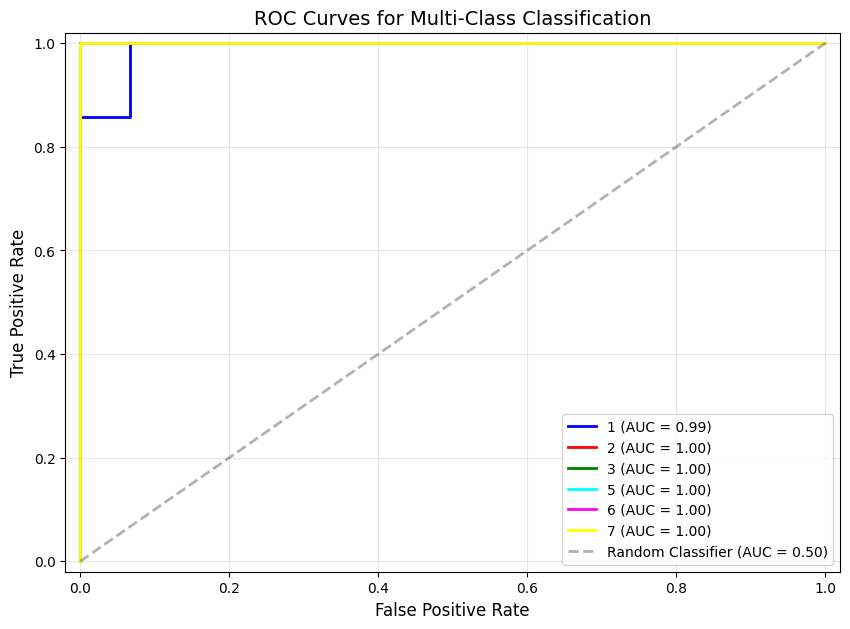

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import label_binarize
import numpy as np

def plot_roc_curves(y_test, y_pred_proba, class_labels=None):
    """
    Plot ROC curves for multi-class classification.

    Parameters:
    -----------
    y_test : array-like
        True labels
    y_pred_proba : array-like
        Predicted probabilities from the classifier
    class_labels : list, optional
        List of class names. If None, numerical labels will be used.
    """
    # Get unique classes
    unique_classes = np.unique(y_test)
    n_classes = len(unique_classes)

    # Binarize the output
    y_test_binarized = label_binarize(y_test, classes=unique_classes)

    # Initialize dictionaries for metrics
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # Calculate ROC curve and AUC for each class
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_proba[:, i])
        roc_auc[i] = roc_auc_score(y_test_binarized[:, i], y_pred_proba[:, i])

    # Create the plot
    plt.figure(figsize=(10, 7))

    # Plot ROC curve for each class
    colors = ['blue', 'red', 'green', 'cyan', 'magenta', 'yellow']
    for i in range(n_classes):
        class_label = class_labels[i] if class_labels is not None else f'Class {unique_classes[i]}'
        plt.plot(fpr[i], tpr[i],
                color=colors[i % len(colors)],
                lw=2,
                label=f'{class_label} (AUC = {roc_auc[i]:.2f})')

    # Plot diagonal line (random classifier)
    plt.plot([0, 1], [0, 1], 'k--',
             label='Random Classifier (AUC = 0.50)',
             lw=2, alpha=0.3)

    # Customize the plot
    plt.xlim([-0.02, 1.02])
    plt.ylim([-0.02, 1.02])
    plt.xlabel('False Positive Rate', fontsize=12)
    plt.ylabel('True Positive Rate', fontsize=12)
    plt.title('ROC Curves for Multi-Class Classification', fontsize=14)
    plt.legend(loc='lower right', fontsize=10)
    plt.grid(True, alpha=0.3)

    return plt.gcf()

# Example usage with your ensemble classifier:
def plot_ensemble_roc(ensemble, X_test, y_test):
    """
    Plot ROC curves for the ensemble classifier.
    """
    # Get predicted probabilities
    meta_features = np.hstack([
        model.predict_proba(X_test)
        for model in ensemble.calibrated_models.values()
    ])
    y_pred_proba = ensemble.meta_classifier.predict_proba(meta_features)

    # Plot ROC curves
    fig = plot_roc_curves(y_test, y_pred_proba,
                         class_labels=ensemble.label_encoder.classes_)
    return fig

# Usage:
fig = plot_ensemble_roc(ensemble, X_test, y_test)
plt.show()


Confusion Matrix Analysis:
----------------------------------------
Total Samples: 22
Correct Predictions: 20
Overall Accuracy: 90.91%

Per-class Metrics:
----------------------------------------

Class: 1
Precision: 85.71%
Recall: 85.71%
F1-Score: 85.71%

Class: 2
Precision: 88.89%
Recall: 100.00%
F1-Score: 94.12%

Class: 3
Precision: 100.00%
Recall: 50.00%
F1-Score: 66.67%

Class: 5
Precision: 100.00%
Recall: 100.00%
F1-Score: 100.00%

Class: 6
Precision: 100.00%
Recall: 100.00%
F1-Score: 100.00%

Class: 7
Precision: 100.00%
Recall: 100.00%
F1-Score: 100.00%


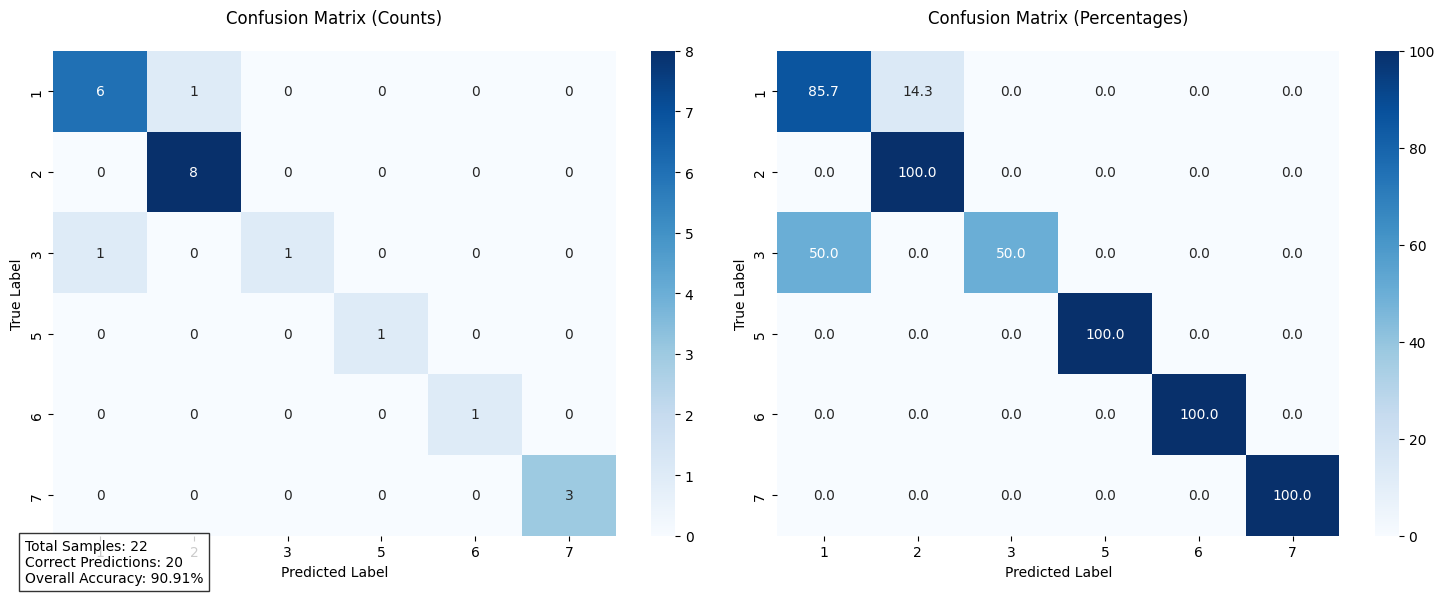

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_confusion_matrices(y_true, y_pred, class_labels=None):
    """
    Plot two confusion matrices side by side: one with counts and one with percentages.

    Parameters:
    -----------
    y_true : array-like
        True labels
    y_pred : array-like
        Predicted labels
    class_labels : list, optional
        List of class names. If None, unique values from y_true will be used.
    """
    # Create confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    # Convert to percentages for the second plot
    cm_percent = (cm / cm.sum(axis=1)[:, np.newaxis]) * 100

    # Create a figure with two subplots side by side
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

    # Plot raw counts
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax1,
                xticklabels=class_labels, yticklabels=class_labels)
    ax1.set_title('Confusion Matrix (Counts)', pad=20)
    ax1.set_xlabel('Predicted Label')
    ax1.set_ylabel('True Label')

    # Plot percentages
    sns.heatmap(cm_percent, annot=True, fmt='.1f', cmap='Blues', ax=ax2,
                xticklabels=class_labels, yticklabels=class_labels)
    ax2.set_title('Confusion Matrix (Percentages)', pad=20)
    ax2.set_xlabel('Predicted Label')
    ax2.set_ylabel('True Label')

    # Add text with additional metrics
    total_samples = cm.sum()
    correct_predictions = cm.diagonal().sum()
    accuracy = correct_predictions / total_samples

    plt.figtext(0.02, 0.02, f'Total Samples: {total_samples}\n'
                f'Correct Predictions: {correct_predictions}\n'
                f'Overall Accuracy: {accuracy:.2%}',
                fontsize=10, bbox=dict(facecolor='white', alpha=0.8))

    plt.tight_layout()

    # Print detailed metrics
    print("\nConfusion Matrix Analysis:")
    print("-" * 40)
    print(f"Total Samples: {total_samples}")
    print(f"Correct Predictions: {correct_predictions}")
    print(f"Overall Accuracy: {accuracy:.2%}")

    # Per-class metrics
    print("\nPer-class Metrics:")
    print("-" * 40)
    precision = cm.diagonal() / cm.sum(axis=0)
    recall = cm.diagonal() / cm.sum(axis=1)
    f1 = 2 * (precision * recall) / (precision + recall)

    for i, label in enumerate(class_labels if class_labels is not None else range(len(cm))):
        print(f"\nClass: {label}")
        print(f"Precision: {precision[i]:.2%}")
        print(f"Recall: {recall[i]:.2%}")
        print(f"F1-Score: {f1[i]:.2%}")

    return fig

def plot_ensemble_confusion_matrix(ensemble, X_test, y_test):
    """
    Plot confusion matrix for the ensemble classifier.
    """
    # Get predictions
    y_pred = ensemble.predict(X_test)

    # Plot confusion matrices
    fig = plot_confusion_matrices(y_test, y_pred,
                                class_labels=ensemble.label_encoder.classes_)
    return fig

# Usage:
fig = plot_ensemble_confusion_matrix(ensemble, X_test, y_test)
plt.show()